In [3891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import matplotlib.ticker as mtick

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

import re


from sklearn.model_selection import train_test_split

# K Means Clustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

# DT 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV 

# Boosted DT 
from sklearn.ensemble import AdaBoostRegressor

# Scaler for ANN
from sklearn.preprocessing import StandardScaler

# Random Forest
from sklearn.ensemble import RandomForestRegressor 


# ANN
from sklearn.neural_network import MLPRegressor

# KMeans 
from sklearn.cluster import KMeans

# SVM
from sklearn.svm import SVR 

# KNN
from sklearn.neighbors import KNeighborsRegressor 

import scipy
from scipy import stats


import xgboost

In [3892]:
os.listdir()


['Movie_Rankings.csv',
 'imdb_updated',
 'Movies.ipynb',
 'Movies_2020.xlsx',
 '.DS_Store',
 'Archive',
 'Movies_Ranked.csv',
 'Movies_Params.xlsx',
 '~$Movies_2020.xlsx',
 'Movies_Updated.ipynb',
 'IMDB',
 '.ipynb_checkpoints',
 'Movies - Personal Inquiry.ipynb',
 'Movies.csv',
 'MLR_Movies.ipynb']

In [3893]:
data = pd.read_excel('Movies_2020.xlsx', 
                    dtype = {'ReleaseYear': int}
                    )

In [3894]:
data.head()

,Name,Rating,WatchDate,ReleaseYear,Director,Genre
0,Star Wars: Episode VII - The Force Awakens,0.85,2016-01-01,2015,Abrams,Fantasy/ScienceFiction
1,The Hunger Games: Mockingjay - Part 2,0.65,2016-01-04,2015,Lawrence,Fantasy/Drama
2,Along Came Polly,0.65,2016-01-08,2004,Hamburg,Romance/Comedy
3,Forrest Gump,0.95,2016-01-10,1994,Zemeckis,Comedy/Drama
4,The Big Short,0.95,2016-01-14,2015,McKay,Comedy/Drama


In [3895]:
print("There are ",data.shape[0], " movies in this dataset")

There are  166  movies in this dataset


In [3896]:
data.dtypes

Name                   object
Rating                float64
WatchDate      datetime64[ns]
ReleaseYear             int64
Director               object
Genre                  object
dtype: object

In [3897]:
data.isna().sum()

Name           0
Rating         0
WatchDate      0
ReleaseYear    0
Director       0
Genre          0
dtype: int64

#### The movie watchings are skewed heavily toward recent movies, with some noticable peaks in 1950s (due to Hitchcock & Audrey Hepburn films)

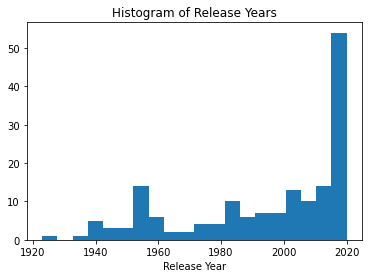

In [3898]:
plt.hist(data['ReleaseYear'], bins = 20)
plt.xlabel('Release Year')
plt.title("Histogram of Release Years")
plt.show()

#### The Ratings also show that I generally rate movies highly, this distribution is right-skewed as well

In [3899]:
data['Rating'].describe()

count    166.000000
mean       0.790663
std        0.140282
min        0.250000
25%        0.700000
50%        0.845000
75%        0.900000
max        0.990000
Name: Rating, dtype: float64

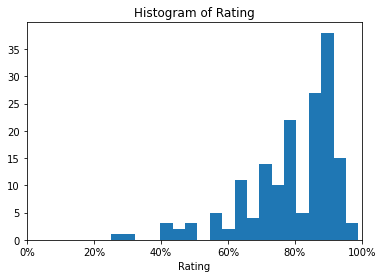

In [3900]:
plt.hist(data['Rating'], bins = 20)
plt.xlabel('Rating')
plt.xlim(0, 1)
plt.title("Histogram of Rating")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

#### My movie intake is quite high during the 2020 Global Covid-19 Pandemic. It also was pretty high in early 2016, as I was in my senior spring of college. This charts the quarterly sum of movies. 

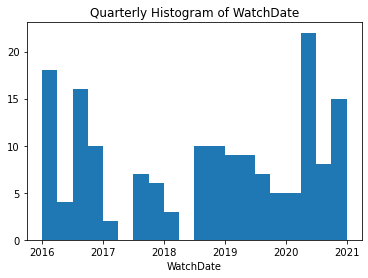

In [3901]:
plt.hist(data['WatchDate'], bins = 20)
plt.xlabel('WatchDate')
plt.title("Quarterly Histogram of WatchDate")
plt.show()

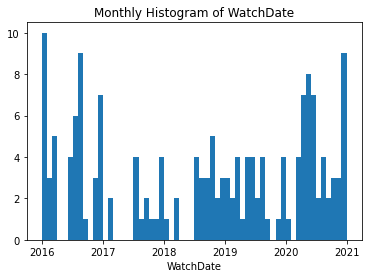

In [3902]:
plt.hist(data['WatchDate'], bins = 60)
plt.xlabel('WatchDate')
plt.title("Monthly Histogram of WatchDate")
plt.show()

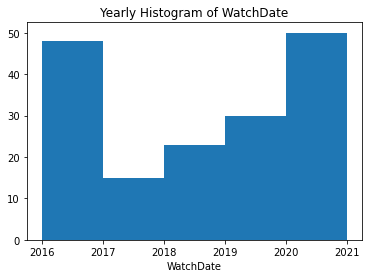

In [3903]:
plt.hist(data['WatchDate'], bins = 5)
plt.xlabel('WatchDate')
plt.title("Yearly Histogram of WatchDate")
plt.show()

#### What is my average rating over time?

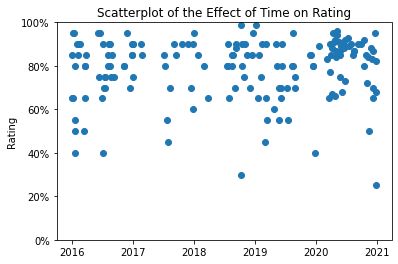

In [3904]:
plt.scatter(data['WatchDate'], data['Rating'])
plt.title("Scatterplot of the Effect of Time on Rating")
plt.ylabel('Rating')
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

#### Am I watching newer movies over time?

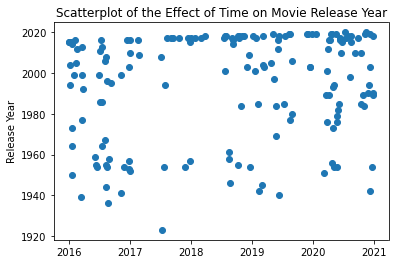

In [3905]:
plt.scatter(data['WatchDate'], data['ReleaseYear'])
plt.title("Scatterplot of the Effect of Time on Movie Release Year")
plt.ylabel('Release Year')
plt.show()

#### Create a Monthly Aggregation to Summarize Trends

In [3906]:

data['WatchMonth'] = data['WatchDate'].values.astype('datetime64[M]')

data_month = data.groupby(['WatchMonth']).agg(
                    count = pd.NamedAgg( column = 'Name', aggfunc = 'count'),
                    rating = pd.NamedAgg( column = 'Rating', aggfunc = 'mean'),
                    movieyear = pd.NamedAgg( column = 'ReleaseYear', aggfunc = 'mean')
                )
data_month = data_month.reset_index()
#data_month.rename(columns = {'Name':'Count'}, inplace = True)
data_month.head()


,WatchMonth,count,rating,movieyear
0,2016-01-01,10,0.720000,1994.30
1,2016-02-01,3,0.883333,2011.00
2,2016-03-01,5,0.720000,1984.00
3,2016-06-01,4,0.825000,1966.75
4,2016-07-01,6,0.700000,1996.00


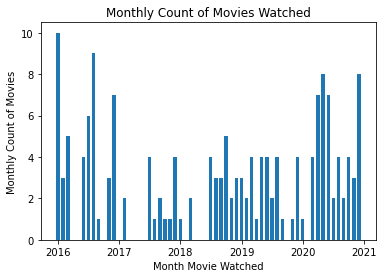

In [3907]:
plt.bar(data_month['WatchMonth'], data_month['count'], width = 20)
plt.xlabel('Month Movie Watched')
plt.ylabel('Monthly Count of Movies')
plt.title('Monthly Count of Movies Watched')
plt.show()

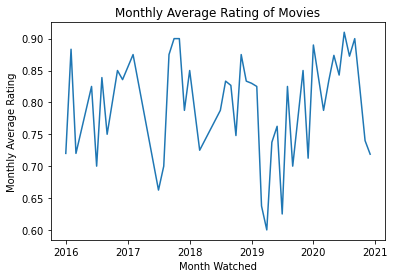

In [3908]:
plt.plot(data_month['WatchMonth'], data_month['rating'])
plt.title('Monthly Average Rating of Movies')
plt.xlabel('Month Watched')
plt.ylabel('Monthly Average Rating')
plt.show()

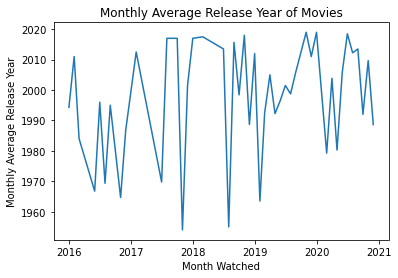

In [3909]:
plt.plot(data_month['WatchMonth'], data_month['movieyear'])
plt.title('Monthly Average Release Year of Movies')
plt.xlabel('Month Watched')
plt.ylabel('Monthly Average Release Year')
plt.show()

#### Is there a relationship between Year of the Movie Release and my Rating?

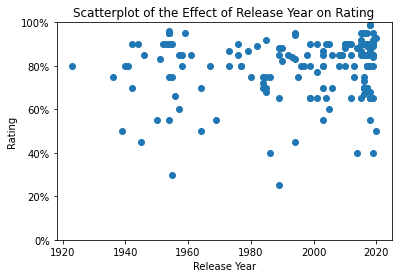

In [3910]:
plt.scatter(data['ReleaseYear'], data['Rating'])
plt.title('Scatterplot of the Effect of Release Year on Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

#### What are my highest rated movies?

In [3911]:
data.sort_values(by=['Rating'], ascending = False).head(10)

,Name,Rating,WatchDate,ReleaseYear,Director,Genre,WatchMonth
86,On the Basis of Sex,0.99,2019-01-06,2018,Mimi Leder,Historical/Drama,2019-01-01
77,Colette,0.99,2018-10-12,2018,Wash Westmoreland,Historical/Drama,2018-10-01
130,Rear Window,0.96,2020-05-05,1954,Alfred Hitchcock,Noir/Mystery,2020-05-01
18,North by Northwest,0.95,2016-06-08,1959,Alfred Hitchcock,Mystery/Drama,2016-06-01
62,The Big Sick,0.95,2017-12-30,2017,Michael Showalter,Romance/Drama,2017-12-01
40,White Christmas,0.95,2016-11-26,1954,Michael Curtiz,Romance/Musical,2016-11-01
124,Hidden Figures,0.95,2020-04-10,2016,Theodore Melfi,Drama/History,2020-04-01
108,The Farewell,0.95,2019-08-17,2019,Lulu Wang,Drama/Comedy,2019-08-01
20,Rear Window,0.95,2016-06-19,1954,Alfred Hitchcock,Thriller/Mystery,2016-06-01
85,White Christmas,0.95,2018-12-23,1954,Michael Curtiz,Romance/Comedy,2018-12-01


#### Which Director have I seen the most movies from?

In [3912]:
data['Director'].value_counts().head()

Alfred Hitchcock     8
Michael Curtiz       5
Damien Chazelle      4
Robert Zemeckis      4
Sylvester Stalone    3
Name: Director, dtype: int64

#### Which movies have I rewatched the most? 

In [3913]:
data['Name'].value_counts().head(11)

White Christmas                                                         4
The Big Short                                                           3
Love Actually                                                           3
The Breakfast Club                                                      2
Vertigo                                                                 2
La La Land                                                              2
Forrest Gump                                                            2
Elf                                                                     2
Ghostbusters                                                            2
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb    2
Rear Window                                                             2
Name: Name, dtype: int64

#### Does my Rating usually increase or decrease upon rewatching? 

In [3914]:
#data.groupby('Name').filter(lambda x: len(x) >= 2)

In [3915]:
repeat_list =  data.groupby('Name').filter(lambda x: len(x) >= 2)['Name'].unique()
repeat_list

array(['Forrest Gump', 'The Big Short',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
       'Rear Window', 'Vertigo', 'White Christmas', 'Love Actually',
       'La La Land', 'Ghostbusters', 'The Breakfast Club', 'Elf'],
      dtype=object)

In [3916]:
for i in range(0, len(repeat_list)):
    print(repeat_list[i])
    print(data[data['Name'] == repeat_list[i]][['Name','Rating']])

Forrest Gump
             Name  Rating
3    Forrest Gump    0.95
131  Forrest Gump    0.94
The Big Short
              Name  Rating
4    The Big Short    0.95
61   The Big Short    0.90
142  The Big Short    0.92
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
                                                 Name  Rating
7   Dr. Strangelove or: How I Learned to Stop Worr...     0.5
25  Dr. Strangelove or: How I Learned to Stop Worr...     0.7
Rear Window
            Name  Rating
20   Rear Window    0.95
130  Rear Window    0.96
Vertigo
       Name  Rating
36  Vertigo    0.85
70  Vertigo    0.80
White Christmas
                Name  Rating
40   White Christmas    0.95
58   White Christmas    0.90
85   White Christmas    0.95
162  White Christmas    0.95
Love Actually
              Name  Rating
42   Love Actually    0.85
83   Love Actually    0.70
114  Love Actually    0.80
La La Land
          Name  Rating
48  La La Land     0.9
74  La La Land     0.9
Ghostbusters
 

#### Drop the Date Watching, Take the Average Rating per Each Movie

In [3917]:
data = data.groupby(['Name']).agg(
                Rating = pd.NamedAgg(column = 'Rating', aggfunc = 'mean'),
                Genre = pd.NamedAgg(column = 'Genre', aggfunc = lambda x: x.value_counts().index[0]),
                ReleaseYear = pd.NamedAgg(column = 'ReleaseYear', aggfunc = lambda x: x.value_counts().index[0]),
                Director = pd.NamedAgg(column = 'Director', aggfunc = lambda x: x.value_counts().index[0])
                )

data = data.reset_index()

In [3918]:
data.shape

(151, 5)

In [3919]:
#data.groupby(['Name'], as_index=False)['Rating'].mean()

### Label Encoding the Genre Column 

In [3920]:
data[['Genre1','Genre2']] = data['Genre'].str.split('/',expand=True)
data['Genre2'] = data['Genre2'].fillna(data['Genre1'])

In [3921]:
data.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2
0,13th,0.90,Documentary/History,2016,Ava DuVernay,Documentary,History
1,500 Days of Summer,0.85,Romance/Drama,2009,Marc Webb,Romance,Drama
2,A Beautiful Day in the Neighborhood,0.85,Drama,2019,Marielle Heller,Drama,Drama
3,All the President's Men,0.90,Drama/Thriller,1976,Alan J. Pakula,Drama,Thriller
4,Along Came Polly,0.65,Romance/Comedy,2004,Hamburg,Romance,Comedy


### Manually Label Encode Genre

Due to the mispellings in the underlying dataset, do manual combinations to reduce the dimensionality of the dataset

In [3922]:

data['Romance_Ind'] = 0 
r = re.compile(r'.*(Romance).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Romance_Ind'] = 1
  
data['Comedy_Ind'] = 0 
r = re.compile(r'.*(Comedy).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Comedy_Ind'] = 1
 
data['Drama_Ind'] = 0 
r = re.compile(r'.*(Drama).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Drama_Ind'] = 1

data['Thriller_Ind'] = 0 
r = re.compile(r'.*(Thriller).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Thriller_Ind'] = 1
 
data['Fantasy_Ind'] = 0 
r = re.compile(r'.*(Fantasy).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Fantasy_Ind'] = 1

data['Crime_Ind'] = 0 
r = re.compile(r'.*(Crime).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Crime_Ind'] = 1

data['Sport_Ind'] = 0 
r = re.compile(r'.*(Sport).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Sport_Ind'] = 1

data['Historical_Ind'] = 0 
r = re.compile(r'.*(Historical).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Historical_Ind'] = 1


data['Mystery_Ind'] = 0 
r = re.compile(r'.*(Mystery).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Mystery_Ind'] = 1


data['Action_Ind'] = 0 
r = re.compile(r'.*(Action).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Action_Ind'] = 1


data['Musical_Ind'] = 0 
r = re.compile(r'.*(Musical).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'Musical_Ind'] = 1


data['SciFi_Ind'] = 0 
r = re.compile(r'.*(Sci).*')
data.loc[ data.Genre.apply(lambda x: bool(r.match(x))), 'SciFi_Ind'] = 1

data['Other_Ind'] = 0
data.loc[ (data['Romance_Ind'] == 0) & (data['Comedy_Ind'] == 0) & (data['Drama_Ind'] == 0) & \
          (data['Thriller_Ind'] == 0) & (data['Fantasy_Ind'] == 0) & (data['Crime_Ind'] == 0) & \
         (data['Sport_Ind'] == 0) & (data['Historical_Ind'] == 0) & (data['Mystery_Ind'] == 0) & \
         (data['Action_Ind'] == 0) & (data['Musical_Ind'] == 0 ) & (data['SciFi_Ind'] == 0)
         , 'Other_Ind'] = 1



In [3923]:
data.describe()

,Rating,ReleaseYear,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.784796,1995.178808,0.225166,0.304636,0.556291,0.079470,0.066225,0.059603,0.052980,0.046358,0.099338,0.052980,0.072848,0.066225,0.026490
std,0.141229,25.836947,0.419081,0.461785,0.498474,0.271371,0.249503,0.237537,0.224739,0.210958,0.300110,0.224739,0.260751,0.249503,0.161122
min,0.250000,1923.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1979.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.830000,2005.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.900000,2017.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.990000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3924]:
data.iloc[:, 9:].sum()

Drama_Ind         84
Thriller_Ind      12
Fantasy_Ind       10
Crime_Ind          9
Sport_Ind          8
Historical_Ind     7
Mystery_Ind       15
Action_Ind         8
Musical_Ind       11
SciFi_Ind         10
Other_Ind          4
dtype: int64

In [3925]:
data.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind
0,13th,0.90,Documentary/History,2016,Ava DuVernay,Documentary,History,0,0,0,0,0,0,0,0,0,0,0,0,1
1,500 Days of Summer,0.85,Romance/Drama,2009,Marc Webb,Romance,Drama,1,0,1,0,0,0,0,0,0,0,0,0,0
2,A Beautiful Day in the Neighborhood,0.85,Drama,2019,Marielle Heller,Drama,Drama,0,0,1,0,0,0,0,0,0,0,0,0,0
3,All the President's Men,0.90,Drama/Thriller,1976,Alan J. Pakula,Drama,Thriller,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Along Came Polly,0.65,Romance/Comedy,2004,Hamburg,Romance,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0


#### Split the Data

In [3926]:
X = data.loc[:, ['ReleaseYear','Romance_Ind', 'Comedy_Ind',
       'Drama_Ind', 'Thriller_Ind', 'Fantasy_Ind', 'Crime_Ind', 'Sport_Ind',
       'Historical_Ind', 'Mystery_Ind', 'Action_Ind', 'Musical_Ind',
       'SciFi_Ind', 'Other_Ind']]
y = data.loc[:, 'Rating']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)
    

In [3927]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(120, 14)
(120,)
(31, 14)
(31,)


In [3928]:
X_Train.head()

,ReleaseYear,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind
15,2017,0,0,0,0,0,0,0,0,0,0,1,0,0
125,1941,0,0,0,0,0,1,0,0,1,0,0,0,0
11,1989,0,0,0,0,0,0,0,0,0,0,0,1,0
127,2017,0,0,1,0,0,0,0,1,0,0,0,0,0
51,2016,0,0,1,0,0,0,0,0,0,0,0,0,0


#### We can't do Clustering on a Binary Dataset. We will have to get something else - such as 'Sentiment Score' using NLP Methods. 
#### Get Sentiment using NLTK, then use that as an input to Clustering 

### Decision Tree on Binary Genre + Release Year Data 

#### 1) Decision Tree

In [3929]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train, Y_Train)

Y_Test_Pred = dt_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

R2 Score: -0.6563461033157048
Mean Squared Error: 0.035202688172043


Grid Search for Best Parameters

In [3930]:
def make_GridSearchCV_DT(X_Train, Y_Train):
    
    criterions = ['mse', 'mae','friedman_mse']
    splitters = ['best', 'random']
    max_depths = list(np.arange(1, 20, 2))
    min_samples_leaf = list(np.arange(3, 13, 1))

    param_grid = {'criterion': criterions, 'splitter': splitters, 
                  'max_depth': max_depths, 
                  'min_samples_leaf':min_samples_leaf}

    classifier = GridSearchCV(DecisionTreeRegressor(random_state=42),
                       param_grid=param_grid, 
                       #scoring='neg_mean_squared_error',
                       scoring='r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    


In [3931]:
make_GridSearchCV_DT(X_Train, Y_Train)

0.00892431433667431
{'criterion': 'mse', 'max_depth': 1, 'min_samples_leaf': 8, 'splitter': 'best'}


R2 Score: 0.03963601637500613
Mean Squared Error: 0.02041082704848666


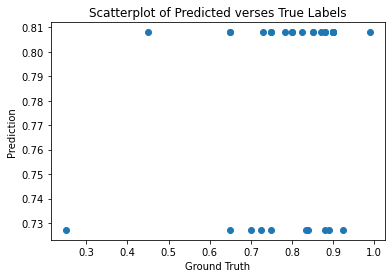

In [3932]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = 1, min_samples_leaf = 8,
                                 random_state = 42)

dt_model.fit(X_Train, Y_Train)

Y_Test_Pred = dt_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

plt.scatter(Y_Test, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 2) Boosted Decision Tree

In [3933]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)

#Y_Train = Y_Train.ravel()

boosted_dt_model.fit(X_Train, Y_Train)
Y_Test_Pred = boosted_dt_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

R2 Score: 0.08600565457845322
Mean Squared Error: 0.019425322925248914


In [3934]:
def make_GridSearchCV_Boosted_DT(X_Train, Y_Train):

    losses = ['linear', 'square', 'exponential']
    learning_rates = np.arange(0.5,1,step=0.10)
    num_est = np.arange(10,100,step=5)

    param_grid = {'loss': losses, 'learning_rate': learning_rates, 'n_estimators': num_est}

    classifier = GridSearchCV(AdaBoostRegressor(random_state=42),
                       param_grid=param_grid, 
                       scoring = 'r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    


In [3935]:
make_GridSearchCV_Boosted_DT(X_Train, Y_Train)

-0.1096382025565612
{'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 10}


R2 Score: 0.0824586731735567
Mean Squared Error: 0.01950070770147331


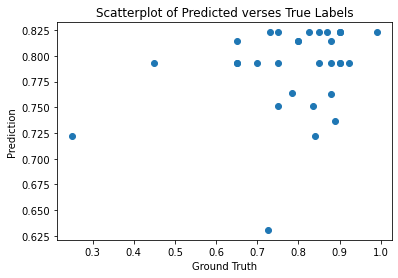

In [3936]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 10, learning_rate = 0.5, loss = 'linear', 
                                     random_state = 42)


boosted_dt_model.fit(X_Train, Y_Train)
Y_Test_Pred = boosted_dt_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

plt.scatter(Y_Test, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

In [3937]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)

ann_model.fit(X_Train, Y_Train)

Y_Test_Pred = ann_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

R2 Score: -1.2337530151812737
Mean Squared Error: 0.047474444314129734


In [3938]:
# This one is only for the Polling Data 
def make_GridSearchCV_ANN(X_Train, Y_Train):
    
    activations = ['identity', 'relu', 'tanh', 'logistic']
    solvers = ['adam']
    hidden_layers = list(np.arange(5, 100, 5))
    
    init_learning_rates = [0.01, 0.05]
    
    param_grid = {'activation': activations, 'solver': solvers, 'hidden_layer_sizes': hidden_layers,'learning_rate_init': init_learning_rates}

    classifier = GridSearchCV(MLPRegressor(max_iter=2000,random_state=42),
                       param_grid=param_grid, 
                       scoring='r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    


In [3939]:
make_GridSearchCV_ANN(X_Train, Y_Train)

0.00559431827819068
{'activation': 'identity', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.05, 'solver': 'adam'}


R2 Score: 0.04644793184736462
Mean Squared Error: 0.02026605191015795


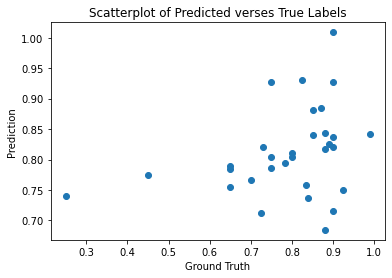

In [3940]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

ann_model =  MLPRegressor(activation = 'identity', solver = 'adam', random_state = 42,
                          hidden_layer_sizes = 20, learning_rate_init = 0.05)

ann_model.fit(X_Train, Y_Train)

Y_Test_Pred = ann_model.predict(X_Test)

print("R2 Score:", r2_score(Y_Test, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test, Y_Test_Pred))

plt.scatter(Y_Test, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### We need to find some better features. Let's explore NLP Sentiment of the Movie Genre

### 1) NLTK Vader Compound Score

### https://www.nltk.org/api/nltk.sentiment.html
### https://github.com/cjhutto/vaderSentiment

If you use the VADER sentiment analysis tools, please cite:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [3941]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def show_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    for key in sorted(ss):
        print('{0}: {1}, '.format(key, ss[key]), end='')
        print()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amandahutter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3942]:
print(data.loc[0,['Genre1']])

word = str(data.loc[0,['Genre1']])
show_vader_score(word)

Genre1    Documentary
Name: 0, dtype: object
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 


In [3943]:
for i in range(0, 5):
    print(data.loc[i,['Genre1']])

    word = str(data.loc[i,['Genre1']])
    show_vader_score(word)

Genre1    Documentary
Name: 0, dtype: object
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Genre1    Romance
Name: 1, dtype: object
compound: 0.5574, 
neg: 0.0, 
neu: 0.581, 
pos: 0.419, 
Genre1    Drama
Name: 2, dtype: object
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Genre1    Drama
Name: 3, dtype: object
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Genre1    Romance
Name: 4, dtype: object
compound: 0.5574, 
neg: 0.0, 
neu: 0.581, 
pos: 0.419, 


In [3944]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    return (ss['compound'])


In [3945]:
# Apply this function to my Genre Columns
data['Genre1_NLTK'] = data['Genre1'].apply(get_vader_score)
data['Genre2_NLTK'] = data['Genre2'].apply(get_vader_score)
data['Genre_NLTK'] = (data['Genre1_NLTK'] + data['Genre2_NLTK']) / 2

#### Much of the NLTK Vader Compound Scores are Zero - let us look for a wider range of scores with other Libraries

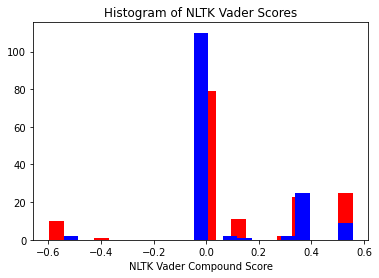

In [3946]:
plt.hist(data['Genre1_NLTK'], bins = 20, color = 'red')
plt.hist(data['Genre2_NLTK'], bins = 20, color = 'blue')

plt.xlabel('NLTK Vader Compound Score')
plt.title('Histogram of NLTK Vader Scores')
plt.show()

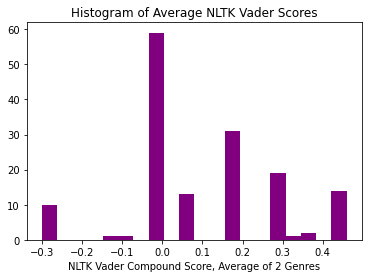

In [3947]:
plt.hist(data['Genre_NLTK'], bins = 20, color = 'purple')
plt.xlabel('NLTK Vader Compound Score, Average of 2 Genres')
plt.title('Histogram of Average NLTK Vader Scores')
plt.show()

### 2) Textblob Polarity Score

In [3948]:
from textblob import TextBlob

# Get the polarity score using below function
def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity

In [3949]:
data['Genre1_TB'] = data['Genre1'].apply(get_textBlob_score)
data['Genre2_TB'] = data['Genre2'].apply(get_textBlob_score)
data['Genre_TB'] = (data['Genre1_TB'] + data['Genre2_TB']) / 2

#### Textblob Scores are even less spread out than NLTK Vader Scores

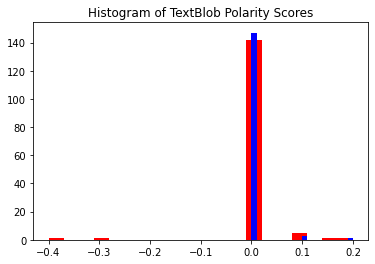

In [3950]:
plt.hist(data['Genre1_TB'], bins = 20, color = 'red')
plt.hist(data['Genre2_TB'], bins = 20, color = 'blue')

plt.title('Histogram of TextBlob Polarity Scores')
plt.show()

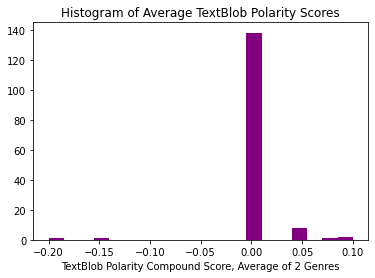

In [3951]:
plt.hist(data['Genre_TB'], bins = 20, color = 'purple')
plt.xlabel('TextBlob Polarity Compound Score, Average of 2 Genres')
plt.title('Histogram of Average TextBlob Polarity Scores')
plt.show()

### 3) SpaCy Sentiment 

In [3952]:
import spacy



In [3953]:
#!python -m spacy download en

#spacy.load('en_core_web_sm')
nlp_spacy = spacy.load('en')

docs = nlp_spacy('romance comedy action crime drama horror musical')

for word in docs:
    print(word.text,word.pos_, word.sentiment)

romance NOUN 0.0
comedy PROPN 0.0
action NOUN 0.0
crime NOUN 0.0
drama NOUN 0.0
horror NOUN 0.0
musical ADJ 0.0


#### Examine NLTK vs Rating

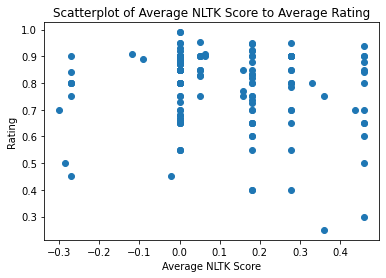

In [3954]:
plt.scatter(data['Genre_NLTK'], data['Rating'])
plt.xlabel('Average NLTK Score')
plt.ylabel('Rating')
plt.title('Scatterplot of Average NLTK Score to Average Rating')
plt.show()

#### Examine NLTK vs Release Year

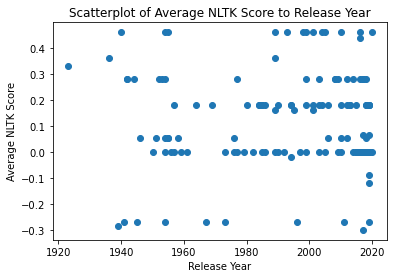

In [3955]:
plt.scatter(data['ReleaseYear'], data['Genre_NLTK'])
plt.ylabel('Average NLTK Score')
plt.xlabel('Release Year')
plt.title('Scatterplot of Average NLTK Score to Release Year')
plt.show()

### Revisit Clustering Algorithms, Using NLTK Vader Compound Genre Score + Movie Release Year to Determine the Clusters 

### Cluster Using These Methods:
- K Means
- Expectation Maximization
- Heirarchical

### 1) K-Means

#### How many clusters should we pick? Use Elbow Method 

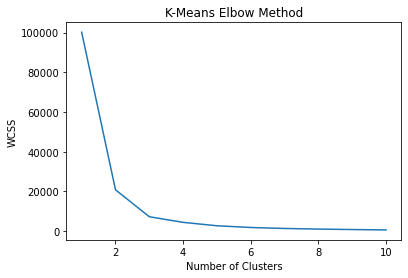

In [3956]:
X = data.loc[:, ['ReleaseYear','Genre_NLTK']].values

# Use elbow method to find optimal number of Clusters 

wcss = [] 

# fit KMeans to our data X 
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 43)
    kmeans.fit(X)
    # compute WCSS and append to our list, also called 'Inertia' in KMeans class 
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [3957]:
#import matplotlib.cm as cm

def run_kmeans(X_Data, range_num_clusters, title):
      
    n_clusters_list = []
    inertia_list = []
    avg_silhouette_list = []
    
    for n_clusters in range_num_clusters:
        kmeans_clusterer =  KMeans(n_clusters = n_clusters, init = 'k-means++', n_init = 10, random_state = 42)
        kmeans_cluster_labels = kmeans_clusterer.fit_predict(X_Data)
        kmeans_silhouette_avg = silhouette_score(X_Data, kmeans_cluster_labels)

        
        n_clusters_list.append(n_clusters)
        inertia_list.append(kmeans_clusterer.inertia_)
        avg_silhouette_list.append(kmeans_silhouette_avg)
        
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(n_clusters_list, inertia_list, 'blue', label = 'Inertia')
    ax1.set_xlabel('Number of Clusters')
    ax1.plot([], [], 'green', label = 'Silhouette Score')
    ax1.legend()
    ax1.set_ylabel('Inertia')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(n_clusters_list, avg_silhouette_list, 'green', label = 'Silhouette Score')
    ax2.set_ylabel('Avg. Silhouette Score')
    plt.grid(False)

    plt.title("The Effect of Number of Clusters \non Inertia and Avg. Silhouette Score  \n for " + title + " with K-Means")
    
    fig.tight_layout()
    plt.show()
    

We want to Maximize Silhouette Score and Minimize Inertia - find place where Inertia is no longer decreasing as fast. 

<Figure size 432x288 with 0 Axes>

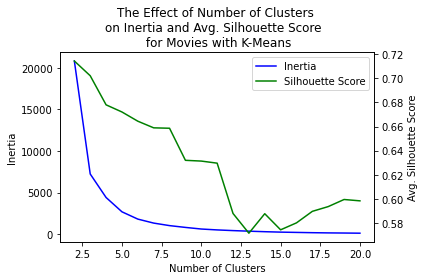

In [3958]:
run_kmeans(X, np.arange(2, 21, 1), "Movies")

### K-Means results:
- Elbow method suggests K = 3 clusters
- Silhouette score is still higher for K = 11 clusters

#### K Means with K = 3

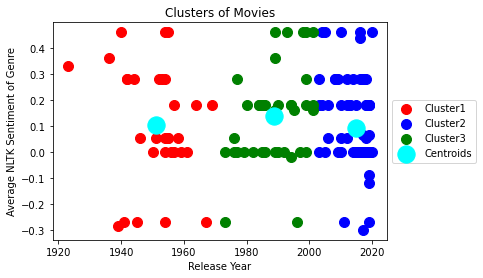

In [3959]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 42)
Y_kmeans = kmeans.fit_predict(X)
#print(Y_kmeans)

#print(Y_kmeans.shape)
#print(X.shape)

plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster3')

# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Release Year')
plt.ylabel('Average NLTK Sentiment of Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### K-Means with K = 11

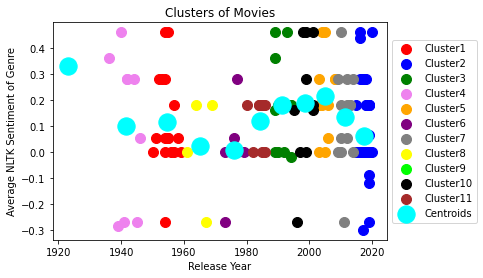

In [3960]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, random_state = 42)
Y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
plt.scatter(X[Y_kmeans == 5, 0], X[Y_kmeans == 5, 1], s = 100, color = 'purple', label = 'Cluster6')
plt.scatter(X[Y_kmeans == 6, 0], X[Y_kmeans == 6, 1], s = 100, color = 'gray', label = 'Cluster7')
plt.scatter(X[Y_kmeans == 7, 0], X[Y_kmeans == 7, 1], s = 100, color = 'yellow', label = 'Cluster8')
plt.scatter(X[Y_kmeans == 8, 0], X[Y_kmeans == 8, 1], s = 100, color = 'lime', label = 'Cluster9')
plt.scatter(X[Y_kmeans == 9, 0], X[Y_kmeans == 9, 1], s = 100, color = 'black', label = 'Cluster10')
plt.scatter(X[Y_kmeans == 10, 0], X[Y_kmeans == 10, 1], s = 100, color = 'brown', label = 'Cluster11')


# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Release Year')
plt.ylabel('Average NLTK Sentiment of Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### The above results are not useful because we did not SCALE the data - only the movie Release Year is dividing up our dataset! 

<Figure size 432x288 with 0 Axes>

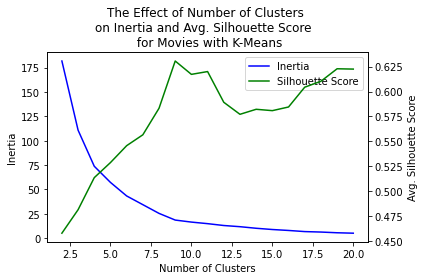

In [3961]:
# Use Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_sc = sc_X.fit_transform(X)

run_kmeans(X_sc, np.arange(2, 21, 1), "Movies")

- K = 4 looks like a kink in the elbow, otherwise K = 9 

#### K-Means with K = 4, Scaled Data

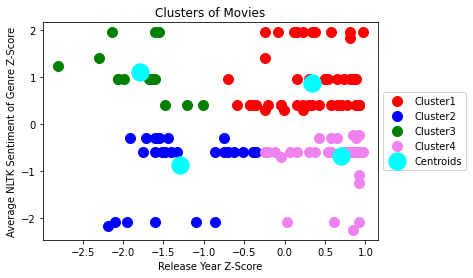

In [3962]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, random_state = 42)
Y_kmeans = kmeans.fit_predict(X_sc)

plt.scatter(X_sc[Y_kmeans == 0, 0], X_sc[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X_sc[Y_kmeans == 1, 0], X_sc[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X_sc[Y_kmeans == 2, 0], X_sc[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X_sc[Y_kmeans == 3, 0], X_sc[Y_kmeans == 3, 1], s = 100, color = 'violet', label = 'Cluster4')


# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Release Year Z-Score')
plt.ylabel('Average NLTK Sentiment of Genre Z-Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### K-Means with K = 9, Scaled Data

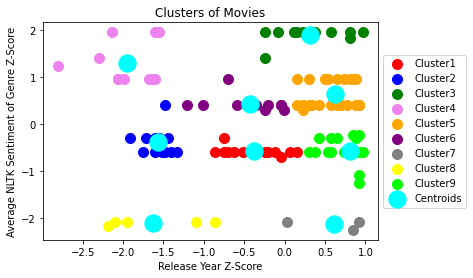

In [3963]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', n_init = 10, random_state = 42)
Y_kmeans = kmeans.fit_predict(X_sc)


plt.scatter(X_sc[Y_kmeans == 0, 0], X_sc[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X_sc[Y_kmeans == 1, 0], X_sc[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X_sc[Y_kmeans == 2, 0], X_sc[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X_sc[Y_kmeans == 3, 0], X_sc[Y_kmeans == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X_sc[Y_kmeans == 4, 0], X_sc[Y_kmeans == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
plt.scatter(X_sc[Y_kmeans == 5, 0], X_sc[Y_kmeans == 5, 1], s = 100, color = 'purple', label = 'Cluster6')
plt.scatter(X_sc[Y_kmeans == 6, 0], X_sc[Y_kmeans == 6, 1], s = 100, color = 'gray', label = 'Cluster7')
plt.scatter(X_sc[Y_kmeans == 7, 0], X_sc[Y_kmeans == 7, 1], s = 100, color = 'yellow', label = 'Cluster8')
plt.scatter(X_sc[Y_kmeans == 8, 0], X_sc[Y_kmeans == 8, 1], s = 100, color = 'lime', label = 'Cluster9')

# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Movies')
plt.xlabel('Release Year Z-Score')
plt.ylabel('Average NLTK Sentiment of Genre Z-Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [3964]:
data['KMeans_Cluster'] = Y_kmeans

In [3965]:
data.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster
0,13th,0.90,Documentary/History,2016,Ava DuVernay,Documentary,History,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0000,0.00000,0.0,0.0,0.0,8
1,500 Days of Summer,0.85,Romance/Drama,2009,Marc Webb,Romance,Drama,1,0,1,0,0,0,0,0,0,0,0,0,0,0.5574,0.0000,0.27870,0.0,0.0,0.0,4
2,A Beautiful Day in the Neighborhood,0.85,Drama,2019,Marielle Heller,Drama,Drama,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.00000,0.0,0.0,0.0,8
3,All the President's Men,0.90,Drama/Thriller,1976,Alan J. Pakula,Drama,Thriller,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0000,0.1027,0.05135,0.0,0.0,0.0,0
4,Along Came Polly,0.65,Romance/Comedy,2004,Hamburg,Romance,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0.5574,0.3612,0.45930,0.0,0.0,0.0,2


### 2) Expectation Maximization

No Scaling Needed
https://stats.stackexchange.com/questions/371333/is-it-important-to-make-a-feature-scaling-before-using-gaussian-mixture-model

In [3966]:
from sklearn.mixture import GaussianMixture as EM

def run_em(X_Data, k_list, title, cov_type):
    
    aic_list = []
    bic_list = []
    avg_silhouette_list = []
    n_components_list = []
    
    for k in k_list:
        em = EM(n_components = k, covariance_type = cov_type, n_init = 1, init_params = 'kmeans', random_state = 42)
        em_labels = em.fit_predict(X_Data)
        
        n_components_list.append(k)
        avg_silhouette_list.append(silhouette_score(X_Data, em_labels))
        aic_list.append(em.aic(X_Data))
        bic_list.append(em.bic(X_Data))
        
    fig, ax1 = plt.subplots()
    ax1.plot(n_components_list, aic_list, 'blue', label = 'AIC')
    ax1.plot(n_components_list, bic_list, 'green', label = 'BIC')
    ax1.set_xlabel('Number of Components')
    ax1.plot([], [], 'orange', label = 'Silhouette Score')
    ax1.legend()
    ax1.set_ylabel('AIC/BIC Curves')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(n_components_list, avg_silhouette_list, 'orange', label = 'Silhouette Score')
    ax2.set_ylabel('Avg. Silhouette Score')
    plt.grid(False)

    plt.title("The Effect of Number of Components \non BIC/AIC and Avg. Silhouette Score  \nfor " + title + " with EM, "+ cov_type+" Covariance")
    
    fig.tight_layout()
    plt.show()


Covariance type: full


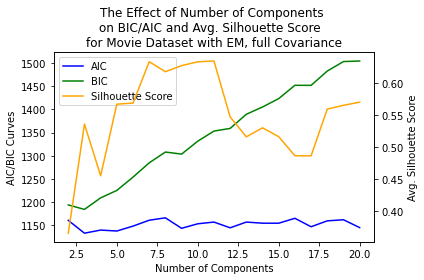

Covariance type: tied


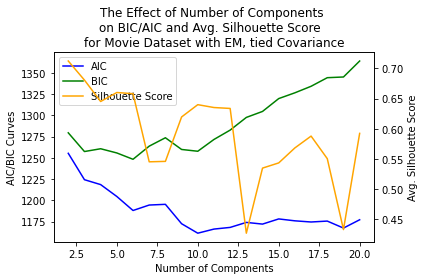

Covariance type: diag


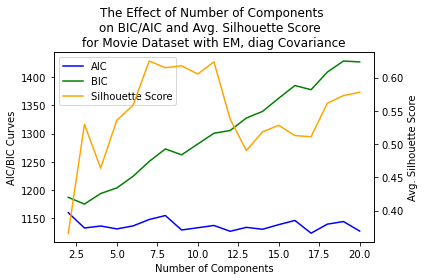

Covariance type: spherical


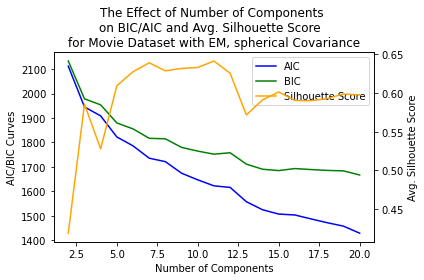

In [3967]:
covariance_type = ['full', 'tied', 'diag', 'spherical']

for cv in covariance_type:
    print("Covariance type:", cv)
    run_em(X, np.arange(2, 21, 1), "Movie Dataset", cv)

- full: K = 7
- tied: K = 10
- diag: K = 6 
- spherical: K = 7 or 8 


#### Try Tied Covariance with K = 10, this has a high separation of clusters, as determined by the higher Silhouette Score. This shows us how far apart the clusters are. 

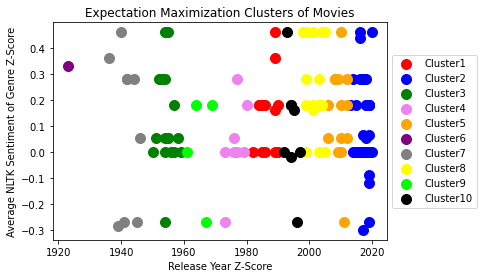

In [3968]:
em = EM(n_components = 10, covariance_type = 'tied', init_params = 'kmeans', n_init = 10, random_state = 42)
Y_em = em.fit_predict(X)


plt.scatter(X[Y_em == 0, 0], X[Y_em == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_em == 1, 0], X[Y_em == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_em == 2, 0], X[Y_em == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X[Y_em == 3, 0], X[Y_em == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X[Y_em == 4, 0], X[Y_em == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
plt.scatter(X[Y_em == 5, 0], X[Y_em == 5, 1], s = 100, color = 'purple', label = 'Cluster6')
plt.scatter(X[Y_em == 6, 0], X[Y_em == 6, 1], s = 100, color = 'gray', label = 'Cluster7')
plt.scatter(X[Y_em == 7, 0], X[Y_em == 7, 1], s = 100, color = 'yellow', label = 'Cluster8')
plt.scatter(X[Y_em == 8, 0], X[Y_em == 8, 1], s = 100, color = 'lime', label = 'Cluster9')
plt.scatter(X[Y_em == 9, 0], X[Y_em == 9, 1], s = 100, color = 'black', label = 'Cluster10')


plt.title('Expectation Maximization Clusters of Movies')
plt.xlabel('Release Year Z-Score')
plt.ylabel('Average NLTK Sentiment of Genre Z-Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The cluster 9 looks quite small. It may be better to have fewer clusters 

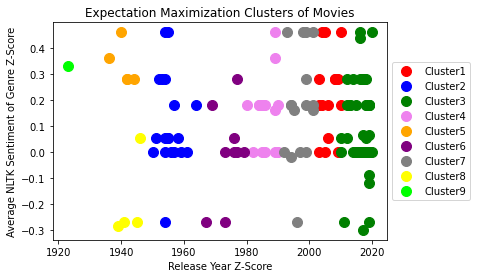

In [3969]:
em = EM(n_components = 9, covariance_type = 'tied', init_params = 'kmeans', n_init = 10, random_state = 42)
Y_em = em.fit_predict(X)


plt.scatter(X[Y_em == 0, 0], X[Y_em == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_em == 1, 0], X[Y_em == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_em == 2, 0], X[Y_em == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X[Y_em == 3, 0], X[Y_em == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X[Y_em == 4, 0], X[Y_em == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
plt.scatter(X[Y_em == 5, 0], X[Y_em == 5, 1], s = 100, color = 'purple', label = 'Cluster6')
plt.scatter(X[Y_em == 6, 0], X[Y_em == 6, 1], s = 100, color = 'gray', label = 'Cluster7')
plt.scatter(X[Y_em == 7, 0], X[Y_em == 7, 1], s = 100, color = 'yellow', label = 'Cluster8')
plt.scatter(X[Y_em == 8, 0], X[Y_em == 8, 1], s = 100, color = 'lime', label = 'Cluster9')

plt.title('Expectation Maximization Clusters of Movies')
plt.xlabel('Release Year Z-Score')
plt.ylabel('Average NLTK Sentiment of Genre Z-Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [3970]:
data['EM_Cluster'] = Y_em

### 3) Hierarchical Clustering 

#### Use Dendrogram to find optimal cluster size - Pick longest Vertical Line. Then, if a horizontal line was drawn through this line, how many cluster groups would we have? 

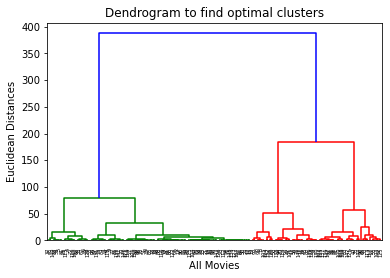

In [3971]:
import scipy.cluster.hierarchy as sch

# Ward tries to minimize variance within cluster. Similar to WCSS for KMeans.
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward' ))

plt.title('Dendrogram to find optimal clusters')
plt.xlabel('All Movies')
plt.ylabel('Euclidean Distances')
plt.show()

- Pick line. Looks like 7 Clusters

#### Hierarchical Clustering with K = 7

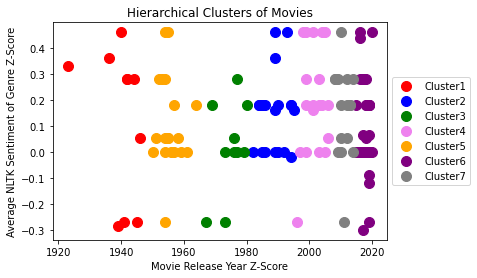

In [3972]:
from sklearn.cluster import AgglomerativeClustering 

# Prepare hc algorithm 
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(X)

plt.scatter(X[Y_hc == 0, 0], X[Y_hc == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_hc == 1, 0], X[Y_hc == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_hc == 2, 0], X[Y_hc == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X[Y_hc == 3, 0], X[Y_hc == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X[Y_hc == 4, 0], X[Y_hc == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
plt.scatter(X[Y_hc == 5, 0], X[Y_hc == 5, 1], s = 100, color = 'purple', label = 'Cluster6')
plt.scatter(X[Y_hc == 6, 0], X[Y_hc == 6, 1], s = 100, color = 'gray', label = 'Cluster7')


plt.title('Hierarchical Clusters of Movies')
plt.xlabel('Movie Release Year Z-Score')
plt.ylabel('Average NLTK Sentiment of Genre Z-Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [3973]:
data['Hierarchical_Cluster'] = Y_hc

In [3974]:
data.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster
0,13th,0.90,Documentary/History,2016,Ava DuVernay,Documentary,History,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0000,0.00000,0.0,0.0,0.0,8,2,5
1,500 Days of Summer,0.85,Romance/Drama,2009,Marc Webb,Romance,Drama,1,0,1,0,0,0,0,0,0,0,0,0,0,0.5574,0.0000,0.27870,0.0,0.0,0.0,4,0,6
2,A Beautiful Day in the Neighborhood,0.85,Drama,2019,Marielle Heller,Drama,Drama,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.00000,0.0,0.0,0.0,8,2,5
3,All the President's Men,0.90,Drama/Thriller,1976,Alan J. Pakula,Drama,Thriller,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0000,0.1027,0.05135,0.0,0.0,0.0,0,5,2
4,Along Came Polly,0.65,Romance/Comedy,2004,Hamburg,Romance,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0.5574,0.3612,0.45930,0.0,0.0,0.0,2,0,3


### Use Cluster Number, Movie Release Year, and Average NLTK Sentiment as Inputs into Decision Trees and other Regression Methods - See how this improves from earlier when we had no clusters 

Split Data

In [3975]:
X_2 = data.loc[:, ['ReleaseYear','Romance_Ind', 'Comedy_Ind',
       'Drama_Ind', 'Thriller_Ind', 'Fantasy_Ind', 'Crime_Ind', 'Sport_Ind',
       'Historical_Ind', 'Mystery_Ind', 'Action_Ind', 'Musical_Ind',
       'SciFi_Ind', 'Other_Ind','Genre_NLTK','KMeans_Cluster']]
y_2  = data.loc[:, 'Rating']

X_Train_2, X_Test_2, Y_Train_2, Y_Test_2 = train_test_split(X_2, y_2, test_size = .20, train_size = .80, random_state = 42)
    

#### 1) Decision Tree with Augmented Data

In [3976]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_2, Y_Train_2)

Y_Test_Pred = dt_model.predict(X_Test_2)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

R2 Score: -0.527776085292551
Mean Squared Error: 0.03247016129032258


Grid Search on New Datasets

In [3977]:
make_GridSearchCV_DT(X_Train_2, Y_Train_2)

0.008924314336674155
{'criterion': 'mse', 'max_depth': 1, 'min_samples_leaf': 8, 'splitter': 'random'}


R2 Score: 0.1845821958720909
Mean Squared Error: 0.01733025400378871


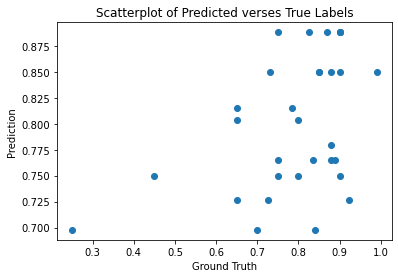

In [4141]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random', 
                                 max_depth = 7, min_samples_leaf = 8,
                                 random_state = 42)

dt_model.fit(X_Train_2, Y_Train_2)

Y_Test_Pred = dt_model.predict(X_Test_2)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

plt.scatter(Y_Test_2, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

This chart shows Decision Tree is only giving us 4 possible predicted values - which makes sense, given tree stops at depth of 3

#### 2) Boosted Decision Tree w/ Augmented Data

Default

In [3979]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_2, Y_Train_2)
Y_Test_Pred = boosted_dt_model.predict(X_Test_2)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

R2 Score: 0.047475075203156636
Mean Squared Error: 0.020244221806419636


In [3980]:
make_GridSearchCV_Boosted_DT(X_Train_aug, Y_Train_aug)

-0.05424721223724984
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 10}


Best Params

R2 Score: 0.10242652548985332
Mean Squared Error: 0.019076326542759637


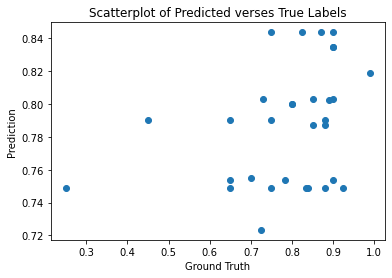

In [3981]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 10, learning_rate = 0.5, loss = 'exponential', 
                                     random_state = 42)


boosted_dt_model.fit(X_Train_2, Y_Train_2)
Y_Test_Pred = boosted_dt_model.predict(X_Test_2)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

plt.scatter(Y_Test_2, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

Default

In [3982]:
sc = StandardScaler()
X_Train_2_sc = sc.fit_transform(X_Train_2)
X_Test_2_sc = sc.transform(X_Test_2)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)

ann_model.fit(X_Train_2_sc, Y_Train_2)

Y_Test_Pred = ann_model.predict(X_Test_2_sc)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

R2 Score: -0.6816470125854825
Mean Squared Error: 0.035740413963597194


In [3983]:
make_GridSearchCV_ANN(X_Train_2_sc, Y_Train_2)

-0.05598546824171251
{'activation': 'identity', 'hidden_layer_sizes': 15, 'learning_rate_init': 0.05, 'solver': 'adam'}


Best Params

R2 Score: 0.04396608684860659
Mean Squared Error: 0.020318799107985584


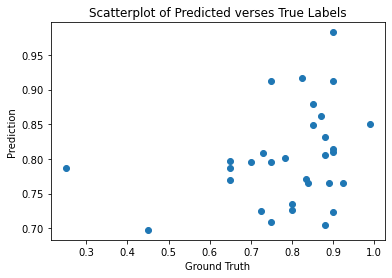

In [3984]:
sc = StandardScaler()
X_Train_2_sc = sc.fit_transform(X_Train_2)
X_Test_2_sc = sc.transform(X_Test_2)

ann_model =  MLPRegressor(activation = 'identity', solver = 'adam', random_state = 42, \
                          hidden_layer_sizes = 15, learning_rate_init = 0.05)

ann_model.fit(X_Train_2_sc, Y_Train_2)

Y_Test_Pred = ann_model.predict(X_Test_2_sc)

print("R2 Score:", r2_score(Y_Test_2, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_2, Y_Test_Pred))

plt.scatter(Y_Test_2, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### Maybe it is a dimensionality problem? 


In [3985]:
X_3 = data.loc[:, ['ReleaseYear','Genre_NLTK','KMeans_Cluster']]
y_3  = data.loc[:, 'Rating']

X_Train_3, X_Test_3, Y_Train_3, Y_Test_3 = train_test_split(X_3, y_3, test_size = .20, train_size = .80, random_state = 42)
    

#### 1) Decision Tree with 3 Dimensions

Defaults

In [3986]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_3, Y_Train_3)

Y_Test_Pred = dt_model.predict(X_Test_3)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

R2 Score: -0.798960248523926
Mean Squared Error: 0.03823369797889287


In [3987]:
make_GridSearchCV_DT(X_Train_3, Y_Train_3)

-0.03518452854107275
{'criterion': 'mse', 'max_depth': 1, 'min_samples_leaf': 7, 'splitter': 'random'}


Best Params

R2 Score: 0.11951829068594277
Mean Squared Error: 0.018713071496424052


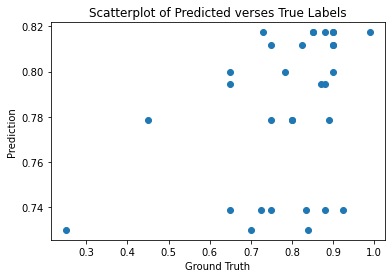

In [4146]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random', 
                                 max_depth = 4, min_samples_leaf = 7,
                                 random_state = 42)

dt_model.fit(X_Train_3, Y_Train_3)

Y_Test_Pred = dt_model.predict(X_Test_3)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

plt.scatter(Y_Test_3, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 2) Boosted Decision Tree with 3 Params

In [3989]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)


boosted_dt_model.fit(X_Train_3, Y_Train_3)
Y_Test_Pred = boosted_dt_model.predict(X_Test_3)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

R2 Score: 0.027401898514220258
Mean Squared Error: 0.020670841447199065


In [3990]:
make_GridSearchCV_Boosted_DT(X_Train_3, Y_Train_3)

-0.13871663955738942
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 10}


R2 Score: 0.09524248330163798
Mean Squared Error: 0.019229010572057798


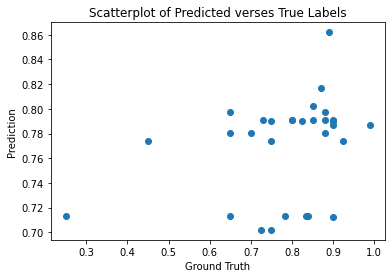

In [4147]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 10, learning_rate = 0.5, loss = 'exponential', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_3, Y_Train_3)
Y_Test_Pred = boosted_dt_model.predict(X_Test_3)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

plt.scatter(Y_Test_3, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

In [3992]:
sc = StandardScaler()
X_Train_3_sc = sc.fit_transform(X_Train_3)
X_Test_3_sc = sc.transform(X_Test_3)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)
ann_model.fit(X_Train_3_sc, Y_Train_3)
Y_Test_Pred = ann_model.predict(X_Test_3_sc)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

R2 Score: 0.08061433398347273
Mean Squared Error: 0.019539905848081702


In [3993]:
make_GridSearchCV_ANN(X_Train_3_sc, Y_Train_3)

-0.07525833393387907
{'activation': 'logistic', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.01, 'solver': 'adam'}


R2 Score: 0.03141283446519194
Mean Squared Error: 0.020585596142925128


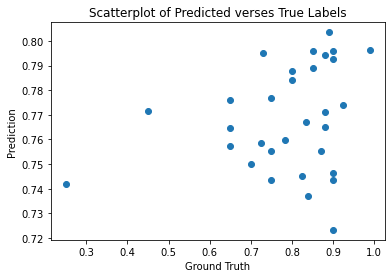

In [4150]:
sc = StandardScaler()
X_Train_3_sc = sc.fit_transform(X_Train_3)
X_Test_3_sc = sc.transform(X_Test_3)

ann_model =  MLPRegressor(activation = 'logistic', solver = 'adam', random_state = 42,
                         hidden_layer_sizes = (70,), learning_rate_init = 0.01)

ann_model.fit(X_Train_3_sc, Y_Train_3)
Y_Test_Pred = ann_model.predict(X_Test_3_sc)

print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

plt.scatter(Y_Test_3, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 4) KNN

In [3995]:
sc = StandardScaler()
X_Train_3_sc = sc.fit_transform(X_Train_3)
X_Test_3_sc = sc.transform(X_Test_3)

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_3_sc, Y_Train_3)
Y_Test_Pred = knn_model.predict(X_Test_3_sc)
            
print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

R2 Score: 0.030513173005417005
Mean Squared Error: 0.020604716845878134


In [3996]:
sc = StandardScaler()
X_Train_3_sc = sc.fit_transform(X_Train_3)
X_Test_3_sc = sc.transform(X_Test_3)

make_GridSearchCV_KNN(X_Train_3_sc, Y_Train_3)

-0.015818757627271585
{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}


R2 Score: 0.13143995667479602
Mean Squared Error: 0.01845969770609319


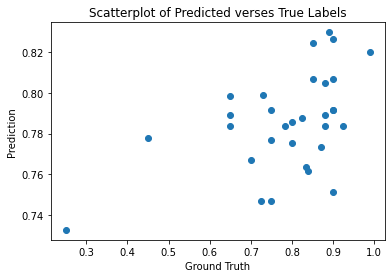

In [3997]:
sc = StandardScaler()
X_Train_3_sc = sc.fit_transform(X_Train_3)
X_Test_3_sc = sc.transform(X_Test_3)

knn_model = KNeighborsRegressor(n_neighbors = 25, weights = 'uniform', p = 1, algorithm = 'auto')
knn_model.fit(X_Train_3_sc, Y_Train_3)
Y_Test_Pred = knn_model.predict(X_Test_3_sc)
            
print("R2 Score:", r2_score(Y_Test_3, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_3, Y_Test_Pred))

plt.scatter(Y_Test_3, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

### The Best result was using  Decision Trees on the full dataset including Movie Release Year, KMeans Cluster Groups, and Genre Binary Indicators 

##### A negative R2 value means that a horizontal line is still a better predictor

### Add IMBD Dataset for additional Dimensions 

In [3998]:
meta = pd.read_csv('IMDB/movies_metadata.csv',
                  parse_dates = ['release_date'],
                  low_memory = False)

In [3999]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4000]:
meta['release_datetime'] = pd.to_datetime(meta['release_date'],  errors='coerce', infer_datetime_format=True)
meta['release_year'] = meta['release_datetime'].dt.year
meta['release_year'] = meta['release_year'].fillna(0)

In [4001]:
meta.shape

(45466, 26)

#### Merge Datasets on Title Column

In [4002]:
data2 = pd.merge(data, meta, left_on = ['Name', 'ReleaseYear'], right_on = ['title', 'release_year'], how = 'left')

In [4003]:
print(data.shape)
print(data2.shape)

(151, 29)
(153, 55)


#### Todo: de-dupe the new dataset, based on year or something else. 

In [4004]:
data2 = data2.sort_values(by = 'vote_count', ascending = False)
#data3 = data2.drop_duplicates(subset = ['Name','ReleaseYear', 'WatchDate'], keep = 'first') # this keeps the movie with more ratings, probably the movie I watched
data3 = data2
print(data3.shape)

(153, 55)


In [4005]:

#data3 = data3.sort_values(by = 'WatchDate', ascending = True)
data3

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_datetime,release_year
57,Inception,0.900000,Thriller/ScienceFiction,2010,Nolan,Thriller,ScienceFiction,0,0,0,1,0,0,0,0,0,0,0,1,0,0.1027,0.0000,0.05135,0.000000,0.0,0.000000,8,2,6,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,/qmDpIHrmpJINaRKAfWQfftjCdyi.jpg,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2010-07-14,8.255328e+08,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0,2010-07-14,2010.0
38,Fight Club,0.900000,Action/Drama,1999,Fincher,Action,Drama,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0000,0.0000,0.00000,0.100000,0.0,0.050000,0,6,3,False,NaN,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,63.869599,/adw6Lq9FiC9zjYEpOqfq03ituwp.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1999-10-15,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0,1999-10-15,1999.0
39,Forrest Gump,0.945000,Comedy/Drama,1994,Robert Zemeckis,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0000,0.18060,0.000000,0.0,0.000000,5,6,1,False,NaN,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,13,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,48.307194,/yE5d3BUhE8hCnkMUJOo1QDoOGNz.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-07-06,6.779454e+08,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The world will never be the same, once you've ...",Forrest Gump,False,8.2,8147.0,1994-07-06,1994.0
137,The Wolf of Wall Street,0.800000,Comedy/Drama,2013,Scorsese,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0000,0.18060,0.000000,0.0,0.000000,4,2,6,False,NaN,100000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.thewolfofwallstreet.com/,106646,tt0993846,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,16.382422,/vK1o5rZGqxyovfIhZyMELhk03wO.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-12-25,3.920007e+08,180.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,EARN. SPEND. PARTY.,The Wolf of Wall Street,False,7.9,6768.0,2013-12-25,2013.0
10,Back to the Future,0.920000,Sci-Fi/Comedy,1985,Robert Zemeckis,Sci-Fi,Comedy,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.3612,0.18060,0.000000,0.0,0.000000,5,3,1,False,"{'id': 264, 'name': 'Back to the Future Collec...",19000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://www.backtothefuture.com/movies/backtoth...,105,tt0088763,en,Back to the Future,Eighties teenager Marty McFly is accidentally ...,25.778509,/pTpxQB1N0waaSc3OSn0e9oc8kx9.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1985-07-03,3.811098e+08,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's the only kid ever to get into trouble bef...,Back to the Future,False,8.0,6239.0,1985-07-03,1985.0
15,Beauty and the Beast,0.850000,Family/Musical,2017,Bill Condon,Family,Musical,0,0,0

In [4008]:
# Used to find proper name to join together 
meta[meta['title'].str.contains('40 Year', na = False)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_datetime,release_year
10301,False,NaN,26000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.universalstudiosentertainment.com/t...,6957,tt0405422,en,The 40 Year Old Virgin,Andy Stitzer has a pleasant life with a nice a...,11.519662,/kFXfr0ioXRfxz4AvQ6RJ7iFF6PI.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-08-11,109449237.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The longer you wait, the harder it gets",The 40 Year Old Virgin,False,6.2,2020.0,2005-08-11,2005.0


### New Data - Downloaded from IMDB, Updated Daily. This data source is more reliable than the one above; move ahead with this source

https://www.imdb.com/interfaces/


In [4009]:
os.listdir('imdb_updated')

['title.principals.tsv.gz',
 'title.ratings.tsv',
 'title.akas.tsv.gz',
 '.DS_Store',
 'title.akas.tsv',
 'title.basics.tsv.gz',
 'title.crew.tsv.gz',
 'name.basics.tsv',
 'title.ratings.tsv.gz',
 'title.basics.tsv',
 'name.basics.tsv.gz',
 'title.episode.tsv',
 'title.crew.tsv',
 'title.episode.tsv.gz']

#### IMBD Data 1 

In [4010]:
basics =  pd.read_csv('imdb_updated/title.basics.tsv', sep='\t', error_bad_lines=False)


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4011]:
basics.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7445319,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7445320,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7445321,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7445322,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
7445323,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


In [4012]:
basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [4013]:
basics.shape

(7445324, 9)

In [4014]:
basics.isna().sum()

tconst            0
titleType         0
primaryTitle      8
originalTitle     8
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            9
dtype: int64

In [4015]:
#### Clean up IMDB Basics Data 

In [4016]:
basics = basics[basics['startYear'] != '\\N']
basics = basics[basics['titleType'] == 'movie']
basics['startYear'] = basics['startYear'].astype(int)

In [4017]:
print(min(basics['startYear']))
print(max(basics['startYear']))

1894
2028


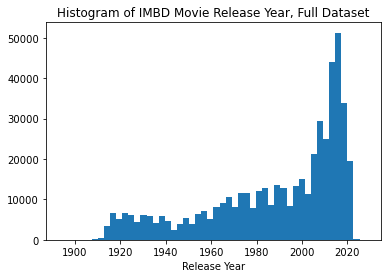

In [4018]:
plt.hist(basics['startYear'], bins = 50)
plt.title('Histogram of IMBD Movie Release Year, Full Dataset')
plt.xlabel('Release Year')
plt.show()

#### IMDB Data 2

In [4019]:
ratings = pd.read_csv('imdb_updated/title.ratings.tsv', sep = '\t', error_bad_lines = False)

In [4020]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1666
1,tt0000002,6.1,207
2,tt0000003,6.5,1385
3,tt0000004,6.2,123
4,tt0000005,6.2,2174


In [4021]:
basics_ratings = pd.merge(basics, ratings, left_on = 'tconst', right_on = 'tconst', how = 'left')

In [4022]:
print(basics.shape)
print(ratings.shape)
print(basics_ratings.shape)

(493215, 9)
(1104266, 3)
(493215, 11)


##### Try this merge 

In [4023]:
data5 = pd.merge(data, basics_ratings, left_on = ['Name', 'ReleaseYear'], right_on = ['primaryTitle', 'startYear'], how = 'left')


In [4024]:
print(data.shape)
print(data5.shape)
print('Need to de-duplicate the IMDB dataset results')

(151, 29)
(154, 40)
Need to de-duplicate the IMDB dataset results


In [4025]:
print('Number missing data:', data5['averageRating'].isna().sum())

Number missing data: 2


Use this code to find the proper title for a movie

In [4026]:
# Use this code to find the proper title for a movie
basics[basics['primaryTitle'].str.contains('Wizard of L', na = False)]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
94355,tt0096455,movie,The Wizard of Loneliness,The Wizard of Loneliness,0,1988,\N,111,Drama


'The Wizard of Lies' is a movie length TV show. We can just drop it from the data set

In [4027]:
# If it can't be found, just drop those columns 

Clean up Duplicates

In [4028]:
data5 = data5.sort_values(by = 'numVotes', ascending = False)
#data6 = data5.drop_duplicates(subset = ['Name','ReleaseYear', 'WatchDate'], keep = 'first') # this keeps the movie with more ratings, probably the movie I watched
data6 = data5
#data6 = data6.sort_values(by = 'WatchDate', ascending = True)
data7 = data6.drop(columns = ['isAdult', 'originalTitle','titleType','endYear'])


In [4029]:
print(data7.shape)

(154, 36)


IMDB Ratings Data

In [4030]:
data7

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
58,Inception,0.900000,Thriller/ScienceFiction,2010,Nolan,Thriller,ScienceFiction,0,0,0,1,0,0,0,0,0,0,0,1,0,0.1027,0.0000,0.05135,0.000000,0.0,0.000000,8,2,6,tt1375666,Inception,2010.0,148,"Action,Adventure,Sci-Fi",8.8,2045436.0
39,Fight Club,0.900000,Action/Drama,1999,Fincher,Action,Drama,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0000,0.0000,0.00000,0.100000,0.0,0.050000,0,6,3,tt0137523,Fight Club,1999.0,139,Drama,8.8,1837769.0
40,Forrest Gump,0.945000,Comedy/Drama,1994,Robert Zemeckis,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0000,0.18060,0.000000,0.0,0.000000,5,6,1,tt0109830,Forrest Gump,1994.0,142,"Drama,Romance",8.8,1789260.0
108,Star Wars: Episode IV - A New Hope,0.800000,ScienceFiction,1977,George Lucas,ScienceFiction,ScienceFiction,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.0000,0.00000,0.000000,0.0,0.000000,0,5,2,tt0076759,Star Wars: Episode IV - A New Hope,1977.0,121,"Action,Adventure,Fantasy",8.6,1220910.0
138,The Wolf of Wall Street,0.800000,Comedy/Drama,2013,Scorsese,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0000,0.18060,0.000000,0.0,0.000000,4,2,6,tt0993846,The Wolf of Wall Street,2013.0,180,"Biography,Crime,Drama",8.2,1168372.0
5,American Beauty,0.800000,Comedy/Drama,1999,Mendes,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0000,0.18060,0.000000,0.0,0.000000,4,6,3,tt0169547,American Beauty,1999.0,122,Drama,8.3,1062513.0
10,Back to the Future,0.920000,Sci-Fi/Comedy,1985,Robert Zemeckis,Sci-Fi,Comedy,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.3612,0.18060,0.000000,0.0,0.000000,5,3,1,tt0088763,Back to the Future,1985.0,116,"Adventure,Comedy,Sci-Fi",8.5,1047525.0
143,V for Vendetta,0.900000,Mystery/Drama,2005,McTiegue,Mystery,Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0000,0.0000,0.00000,0.000000,0.0,0.000000,8,0,3,tt0434409,V for Vendetta,2005.0,132,"Action,Drama,Sci-Fi",8.2,1025404.0
142,Toy Story,0.750000,Adventure/Fantasy,1995,Lasseter,Adventure,Fantasy,0,0,0,0,1,0,0,0,0,0,0,0,0,0.3182,0.0000,0.15910,0.000000,0.0,0.000000,5,6,1,tt0114709,Toy Story,1995.0,81,"Adventure,Animation,Comedy",8.3,879216.0
109,Star Wars: Episode VII - The Force Awakens,0.850000,Fantasy/ScienceFiction,2015,Abrams,Fantasy,ScienceFiction,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0000,0.0000,0.00000,0.000000,0.0,0.000000,8,2,5,tt2488496,Star Wars: Episode VII - The Force Awakens,2015.0,138,"Action,Adventure,Sci-Fi",7.9,854500.0


In [4031]:
full = data7.dropna()
full.loc[:,'runtimeMinutes'] = full.loc[:,'runtimeMinutes'].astype(int)

### Explore the Relationship between this New Data and our existing Features 

Potential Columsn to add to model:
  - averageRating (how good is the movie among other people)
  - numVotes (how popular is movie among other people)
  - runtimeMinutes (how long is the movie)

In [4032]:
full.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
58,Inception,0.900,Thriller/ScienceFiction,2010,Nolan,Thriller,ScienceFiction,0,0,0,1,0,0,0,0,0,0,0,1,0,0.1027,0.0,0.05135,0.0,0.0,0.00,8,2,6,tt1375666,Inception,2010.0,148,"Action,Adventure,Sci-Fi",8.8,2045436.0
39,Fight Club,0.900,Action/Drama,1999,Fincher,Action,Drama,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0000,0.0,0.00000,0.1,0.0,0.05,0,6,3,tt0137523,Fight Club,1999.0,139,Drama,8.8,1837769.0
40,Forrest Gump,0.945,Comedy/Drama,1994,Robert Zemeckis,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0,0.18060,0.0,0.0,0.00,5,6,1,tt0109830,Forrest Gump,1994.0,142,"Drama,Romance",8.8,1789260.0
108,Star Wars: Episode IV - A New Hope,0.800,ScienceFiction,1977,George Lucas,ScienceFiction,ScienceFiction,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.0,0.00000,0.0,0.0,0.00,0,5,2,tt0076759,Star Wars: Episode IV - A New Hope,1977.0,121,"Action,Adventure,Fantasy",8.6,1220910.0
138,The Wolf of Wall Street,0.800,Comedy/Drama,2013,Scorsese,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0,0.18060,0.0,0.0,0.00,4,2,6,tt0993846,The Wolf of Wall Street,2013.0,180,"Biography,Crime,Drama",8.2,1168372.0


#### 1) IMDB Average Rating Verses my Rating

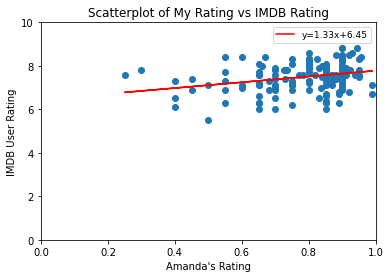

In [4033]:
x = full['Rating']
y =  full['averageRating']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y)
plt.legend(fontsize=9)


plt.xlim(0,1)
plt.ylim(0,10)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('IMDB User Rating')
plt.title('Scatterplot of My Rating vs IMDB Rating')
plt.show()

- There is some positive relationship between the IMDB user rating and my rating for the movie

#### 2) IMDB Viewership vs My Rating

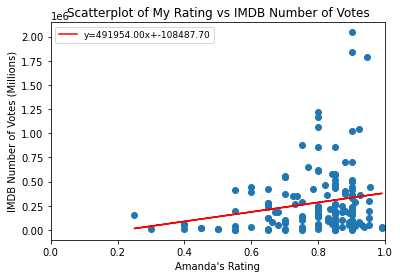

In [4034]:
x = full['Rating']
y = full['numVotes']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y)
plt.legend(fontsize=9)


plt.xlim(0,1)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('IMDB Number of Votes (Millions)')
plt.title('Scatterplot of My Rating vs IMDB Number of Votes')
plt.show()

#### 3) Runtime vs My Rating

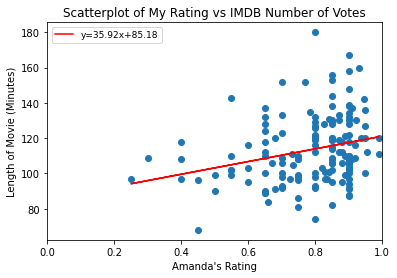

In [4035]:
x = full['Rating']
y = full['runtimeMinutes']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y)
plt.legend(fontsize=9)

plt.xlim(0,1)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('Length of Movie (Minutes)')
plt.title('Scatterplot of My Rating vs IMDB Number of Votes')
plt.show()

### Recall prior variables

#### 4) Release Year vs My Rating

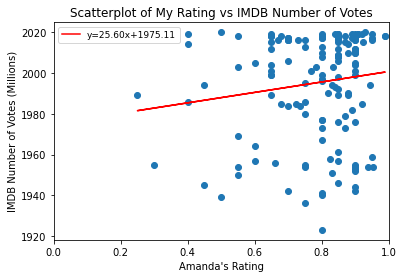

In [4036]:
# plt.scatter(full['Rating'], full['startYear'])
x = full['Rating']
y = full['startYear']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y)
plt.legend(fontsize=9)


plt.xlim(0,1)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('IMDB Number of Votes (Millions)')
plt.title('Scatterplot of My Rating vs IMDB Number of Votes')
plt.show()

#### 5) NLTK Score vs My Rating

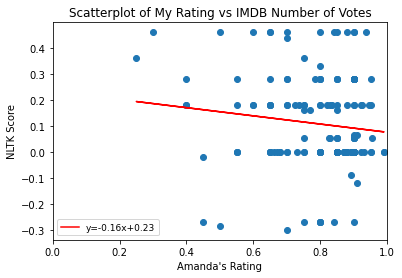

In [4037]:
#plt.scatter(full['Rating'], full['Genre_NLTK'])
x = full['Rating']
y = full['Genre_NLTK']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y)
plt.legend(fontsize=9)

plt.xlim(0,1)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('NLTK Score')
plt.title('Scatterplot of My Rating vs IMDB Number of Votes')
plt.show()

### We want to revisit the NLP scores using the new IMDB database genre columns - in order to get predictions from movies outside our original data -  but first, we can examine how good these 4 variables are

Split Data 

In [4038]:
X_4 = full.loc[:, ['startYear','runtimeMinutes','numVotes','averageRating']]
y_4 = full.loc[:, 'Rating']

X_Train_4, X_Test_4, Y_Train_4, Y_Test_4 = train_test_split(X_4, y_4, test_size = .20, train_size = .80, random_state = 42)
    

### Data: IMDB 4 Features 
### Try: Decision Tree, Boosted Decision Tree, ANN

#### 1) Decision Tree

Default

In [4039]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_4, Y_Train_4)

Y_Test_Pred = dt_model.predict(X_Test_4)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

R2 Score: -0.6745696358492179
Mean Squared Error: 0.039372222222222225


In [4040]:
make_GridSearchCV_DT(X_Train_4, Y_Train_4)

0.016336040912114845
{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'splitter': 'random'}


Best Params

R2 Score: 0.17184215673018877
Mean Squared Error: 0.01947151909497017


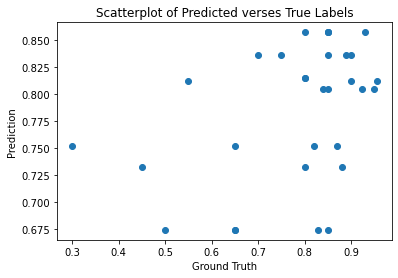

In [4041]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random', 
                                 max_depth = 5, min_samples_leaf = 10,
                                 random_state = 42)

dt_model.fit(X_Train_4, Y_Train_4)

Y_Test_Pred = dt_model.predict(X_Test_4)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

plt.scatter(Y_Test_4, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 2) Boosted Decision Tree

Default

In [4042]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_4, Y_Train_4)
Y_Test_Pred = boosted_dt_model.predict(X_Test_4)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

R2 Score: -0.24369054422718062
Mean Squared Error: 0.029241459676985417


In [4043]:
make_GridSearchCV_Boosted_DT(X_Train_4, Y_Train_4)

-0.047232457304088246
{'learning_rate': 0.6, 'loss': 'linear', 'n_estimators': 15}


Best Params

R2 Score: -0.0870097600846671
Mean Squared Error: 0.02555760531873851


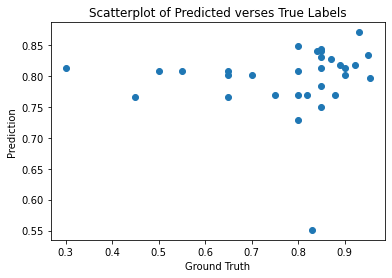

In [4044]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 15, learning_rate = 0.6, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_4, Y_Train_4)
Y_Test_Pred = boosted_dt_model.predict(X_Test_4)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

plt.scatter(Y_Test_4, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

Default

In [4045]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)

ann_model.fit(X_Train_4_sc, Y_Train_4)

Y_Test_Pred = ann_model.predict(X_Test_4_sc)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

R2 Score: -1.389597568530319
Mean Squared Error: 0.05618384836062389


In [4046]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

make_GridSearchCV_ANN(X_Train_4_sc, Y_Train_4)

0.07143880943055891
{'activation': 'logistic', 'hidden_layer_sizes': 45, 'learning_rate_init': 0.01, 'solver': 'adam'}


R2 Score: 0.15115504333343777
Mean Squared Error: 0.01995791130485886


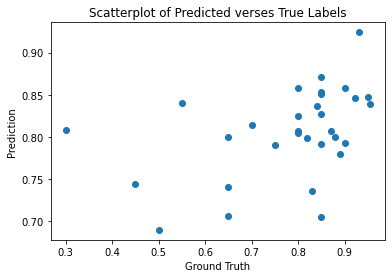

In [4047]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

ann_model =  MLPRegressor(activation = 'logistic', solver = 'adam', random_state = 42,
                         learning_rate_init = 0.01, hidden_layer_sizes = (45,), max_iter=2000)

ann_model.fit(X_Train_4_sc, Y_Train_4)

Y_Test_Pred = ann_model.predict(X_Test_4_sc)

print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

plt.scatter(Y_Test_4, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 4) KNN

In [4048]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_4_sc, Y_Train_4)
Y_Test_Pred = knn_model.predict(X_Test_4_sc)
            
print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

R2 Score: 0.019593965349578912
Mean Squared Error: 0.023051155017921144


In [4049]:
make_GridSearchCV_KNN(X_Train_4_sc, Y_Train_4)

0.08589854197539193
{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


R2 Score: 0.09240857459137042
Mean Squared Error: 0.02133914918984567


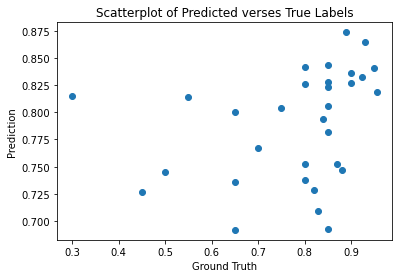

In [4050]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

knn_model = KNeighborsRegressor(n_neighbors = 11, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_4_sc, Y_Train_4)
Y_Test_Pred = knn_model.predict(X_Test_4_sc)
            
print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

plt.scatter(Y_Test_4, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

R2 Score: 0.06589498525589743
Mean Squared Error: 0.021962532600649957


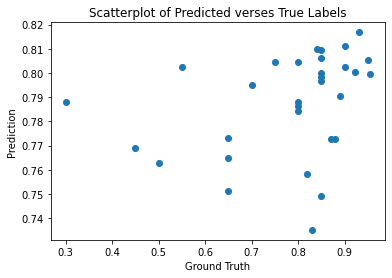

In [4051]:
sc = StandardScaler()
X_Train_4_sc = sc.fit_transform(X_Train_4)
X_Test_4_sc = sc.transform(X_Test_4)

knn_model = KNeighborsRegressor(n_neighbors = 49, weights = 'distance', p = 1, algorithm = 'auto')
knn_model.fit(X_Train_4_sc, Y_Train_4)
Y_Test_Pred = knn_model.predict(X_Test_4_sc)
            
print("R2 Score:", r2_score(Y_Test_4, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_4, Y_Test_Pred))

plt.scatter(Y_Test_4, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

### Add Back the NLP NLTK Scores for the Genre Column, using Genre from IMDB Data, not original dataset 

#### Split out Genre Column

In [4052]:
full[['Genre_1','Genre_2','Genre_3']] = full['genres'].str.split(',',expand=True)

In [4053]:
full.head()

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3
58,Inception,0.900,Thriller/ScienceFiction,2010,Nolan,Thriller,ScienceFiction,0,0,0,1,0,0,0,0,0,0,0,1,0,0.1027,0.0,0.05135,0.0,0.0,0.00,8,2,6,tt1375666,Inception,2010.0,148,"Action,Adventure,Sci-Fi",8.8,2045436.0,Action,Adventure,Sci-Fi
39,Fight Club,0.900,Action/Drama,1999,Fincher,Action,Drama,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0000,0.0,0.00000,0.1,0.0,0.05,0,6,3,tt0137523,Fight Club,1999.0,139,Drama,8.8,1837769.0,Drama,None,None
40,Forrest Gump,0.945,Comedy/Drama,1994,Robert Zemeckis,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0,0.18060,0.0,0.0,0.00,5,6,1,tt0109830,Forrest Gump,1994.0,142,"Drama,Romance",8.8,1789260.0,Drama,Romance,None
108,Star Wars: Episode IV - A New Hope,0.800,ScienceFiction,1977,George Lucas,ScienceFiction,ScienceFiction,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.0,0.00000,0.0,0.0,0.00,0,5,2,tt0076759,Star Wars: Episode IV - A New Hope,1977.0,121,"Action,Adventure,Fantasy",8.6,1220910.0,Action,Adventure,Fantasy
138,The Wolf of Wall Street,0.800,Comedy/Drama,2013,Scorsese,Comedy,Drama,0,1,1,0,0,0,0,0,0,0,0,0,0,0.3612,0.0,0.18060,0.0,0.0,0.00,4,2,6,tt0993846,The Wolf of Wall Street,2013.0,180,"Biography,Crime,Drama",8.2,1168372.0,Biography,Crime,Drama


### Use new IMDB Genre columns + NLTK to get scores to use 

In [4054]:
genre1 = list(full['Genre_1'].unique())
genre2 = list(full['Genre_2'].unique())
genre3 = list(full['Genre_3'].unique())

genre_list = list(set().union(genre1, genre2, genre3))

genre_list.remove('Music')
genre_list.remove(None)
genre_list.append('Other')

In [4055]:
#genre_list

In [4056]:

full['Mystery'] = 0 
r = re.compile(r'.*(Mystery).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Mystery'] = 1
  
full['Film-Noir'] = 0 
r = re.compile(r'.*(Film-Noir).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Film-Noir'] = 1
 
full['Horror'] = 0 
r = re.compile(r'.*(Horror).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Horror'] = 1

full['Thriller'] = 0 
r = re.compile(r'.*(Thriller).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Thriller'] = 1
 
full['Animation'] = 0 
r = re.compile(r'.*(Animation).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Animation'] = 1

full['Sci-Fi'] = 0 
r = re.compile(r'.*(Sci-Fi).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Sci-Fi'] = 1

full['Sport'] = 0 
r = re.compile(r'.*(Sport).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Sport'] = 1

full['Romance'] = 0 
r = re.compile(r'.*(Romance).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Romance'] = 1

full['Documentary'] = 0 
r = re.compile(r'.*(Documentary).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Documentary'] = 1

full['Adventure'] = 0 
r = re.compile(r'.*(Adventure).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Adventure'] = 1

# music and musical 
full['Musical'] = 0 
r = re.compile(r'.*(Music).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Musical'] = 1

full['Comedy'] = 0 
r = re.compile(r'.*(Comedy).*')
full.loc[full.genres.apply(lambda x: bool(r.match(x))), 'Comedy'] = 1

full['Crime'] = 0 
r = re.compile(r'.*(Crime).*')
full.loc[full.genres.apply(lambda x: bool(r.match(x))), 'Crime'] = 1

full['Fantasy'] = 0 
r = re.compile(r'.*(Fantasy).*')
full.loc[full.genres.apply(lambda x: bool(r.match(x))), 'Fantasy'] = 1

full['Action'] = 0 
r = re.compile(r'.*(Action).*')
full.loc[full.genres.apply(lambda x: bool(r.match(x))), 'Action'] = 1

full['History'] = 0 
r = re.compile(r'.*(History).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'History'] = 1

full['Family'] = 0 
r = re.compile(r'.*(Family).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Family'] = 1

full['Biography'] = 0 
r = re.compile(r'.*(Biography).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Biography'] = 1

full['Drama'] = 0 
r = re.compile(r'.*(Drama).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'Drama'] = 1

full['War'] = 0 
r = re.compile(r'.*(War).*')
full.loc[ full.genres.apply(lambda x: bool(r.match(x))), 'War'] = 1

full['Other'] = 0
full.loc[ (full['Mystery'] == 0) & (full['Film-Noir'] == 0) & (full['Horror'] == 0) & \
          (full['Thriller'] == 0) & (full['Animation'] == 0) & (full['Sci-Fi'] == 0) & \
         (full['Sport'] == 0) & (full['Romance'] == 0) & (full['Documentary'] == 0) & \
         (full['Adventure'] == 0) & (full['Musical'] == 0 ) & (full['Comedy'] == 0) & \
         (full['Crime'] == 0) & (full['Fantasy'] == 0) & (full['Action'] == 0) & \
         (full['History'] == 0) & (full['Family'] == 0) & (full['Biography'] == 0) & \
         (full['Drama'] == 0) & (full['War'] == 0)
         , 'Other'] = 1



### Count of each movie type 

In [4057]:
full.iloc[:,-21:].sum()

Mystery        10
Film-Noir       7
Horror          1
Thriller       13
Animation       5
Sci-Fi         10
Sport           7
Romance        35
Documentary     3
Adventure      17
Musical        15
Comedy         74
Crime          24
Fantasy        10
Action         17
History         8
Family          7
Biography      24
Drama          94
War             2
Other           0
dtype: int64

In [4058]:
full[full.Horror == 1]

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3,Mystery,Film-Noir,Horror,Thriller,Animation,Sci-Fi,Sport,Romance,Documentary,Adventure,Musical,Comedy,Crime,Fantasy,Action,History,Family,Biography,Drama,War,Other
106,Son of Frankenstein,0.5,Horror/Drama,1939,Lee,Horror,Drama,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.5719,0.0,-0.28595,0.0,0.0,0.0,7,7,0,tt0031951,Son of Frankenstein,1939.0,99,"Drama,Horror,Sci-Fi",7.1,9043.0,Drama,Horror,Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4059]:
full[full.War == 1]

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3,Mystery,Film-Noir,Horror,Thriller,Animation,Sci-Fi,Sport,Romance,Documentary,Adventure,Musical,Comedy,Crime,Fantasy,Action,History,Family,Biography,Drama,War,Other
23,Casablanca,0.90,Romance/Drama,1942,Michael Curtiz,Romance,Drama,1,0,1,0,0,0,0,0,0,0,0,0,0,0.5574,0.0000,0.2787,0.0,0.0,0.0,3,4,0,tt0034583,Casablanca,1942.0,102,"Drama,Romance,War",8.5,517765.0,Drama,Romance,War,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
60,Jojo Rabbit,0.91,War/Comedy,2019,Waitiki,War,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.5994,0.3612,-0.1191,0.0,0.0,0.0,8,2,5,tt2584384,Jojo Rabbit,2019.0,108,"Comedy,Drama,War",7.9,284488.0,Comedy,Drama,War,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [4060]:
full[full.Documentary == 1]

,Name,Rating,Genre,ReleaseYear,Director,Genre1,Genre2,Romance_Ind,Comedy_Ind,Drama_Ind,Thriller_Ind,Fantasy_Ind,Crime_Ind,Sport_Ind,Historical_Ind,Mystery_Ind,Action_Ind,Musical_Ind,SciFi_Ind,Other_Ind,Genre1_NLTK,Genre2_NLTK,Genre_NLTK,Genre1_TB,Genre2_TB,Genre_TB,KMeans_Cluster,EM_Cluster,Hierarchical_Cluster,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3,Mystery,Film-Noir,Horror,Thriller,Animation,Sci-Fi,Sport,Romance,Documentary,Adventure,Musical,Comedy,Crime,Fantasy,Action,History,Family,Biography,Drama,War,Other
0,13th,0.90,Documentary/History,2016,Ava DuVernay,Documentary,History,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,8,2,5,tt5895028,13th,2016.0,100,"Crime,Documentary,History",8.3,31166.0,Crime,Documentary,History,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
63,Knock Down the House,0.90,Documentary/Political,2019,Rachel Lears,Documentary,Political,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,8,2,5,tt9358052,Knock Down the House,2019.0,87,Documentary,7.1,11283.0,Documentary,None,None,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
77,"Monrovia, Indiana",0.55,Documentary,2018,Frederick Wiseman,Documentary,Documentary,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,8,2,5,tt8749146,"Monrovia, Indiana",2018.0,143,Documentary,6.9,508.0,Documentary,None,None,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Consolidate the columns

In [4061]:
full.loc[(full['Horror'] == 1) |(full['War'] == 1) | (full['Documentary'] == 1) |
         (full['Animation'] == 1) | (full['Film-Noir'] == 1) | (full['Sport'] == 1) |
         (full['History'] == 1) & (full['Family'] == 1) , "Other"] = 1

full = full.drop(columns = ['Horror','Documentary','War', 'Animation', 'Film-Noir', 'Sport', 'History', 'Family'])

genre_list.remove('Horror')
genre_list.remove('War')
genre_list.remove('Documentary')

genre_list.remove('Animation')
genre_list.remove('Film-Noir')
genre_list.remove('Sport')
genre_list.remove('History')
genre_list.remove('Family')

In [4062]:
full[full.Comedy == 1]['Rating'].mean()

0.7560698198198197

In [4063]:
for i in range(0, len(genre_list)):
    genre = genre_list[i]
    print(genre + " : " + str(full[full[genre] == 1]['Rating'].mean()))
    

Mystery : 0.873
Thriller : 0.8507692307692308
Sci-Fi : 0.795
Romance : 0.7688809523809523
Adventure : 0.7944117647058823
Comedy : 0.7560698198198197
Crime : 0.7999999999999999
Fantasy : 0.7695000000000001
Action : 0.7626470588235296
Musical : 0.8244999999999999
Biography : 0.8509722222222219
Drama : 0.7986879432624113
Other : 0.76


In [4064]:
full.iloc[:,-13:].sum()

Mystery      10
Thriller     13
Sci-Fi       10
Romance      35
Adventure    17
Musical      15
Comedy       74
Crime        24
Fantasy      10
Action       17
Biography    24
Drama        94
Other        25
dtype: int64

In [4065]:
# Replace Blanks with filling forward Genre 1 and Genre 2 
full['Genre_2'] = full['Genre_2'].fillna(full['Genre_1'])
full['Genre_3'] = full['Genre_3'].fillna(full['Genre_1'])

### Use NLTK Vader Score, from Prior Analysis, to get sentiment of each column

In [4066]:
# Apply this function to my Genre Columns
full['Genre_1_NLTK'] = full['Genre_1'].apply(get_vader_score)
full['Genre_2_NLTK'] = full['Genre_2'].apply(get_vader_score)
full['Genre_3_NLTK'] = full['Genre_3'].apply(get_vader_score)
full['Genres_NLTK'] = (full['Genre_1_NLTK'] + full['Genre_2_NLTK'] + full['Genre_3_NLTK'] ) / 3

#### Histograms of Genre NLTK Scores using IMDB genres column

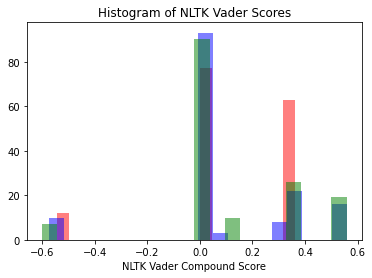

In [4067]:
plt.hist(full['Genre_1_NLTK'], bins = 20, color = 'red', alpha = .5)
plt.hist(full['Genre_2_NLTK'], bins = 20, color = 'blue', alpha = .5)
plt.hist(full['Genre_3_NLTK'], bins = 20, color = 'green', alpha = .5)

plt.xlabel('NLTK Vader Compound Score')
plt.title('Histogram of NLTK Vader Scores')
plt.show()

#### Histogram of Average Genre NLTK Score using IMDB Genres Column

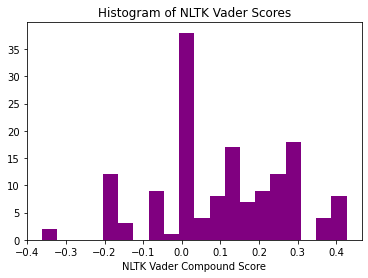

In [4068]:
plt.hist(full['Genres_NLTK'], bins = 20, color = 'purple')

plt.xlabel('NLTK Vader Compound Score')
plt.title('Histogram of NLTK Vader Scores')
plt.show()

#### Histogram Comparing NLTK Score using the 3 Genre columns from IMDB, verses the Manual 2 Genres from my original Dataset

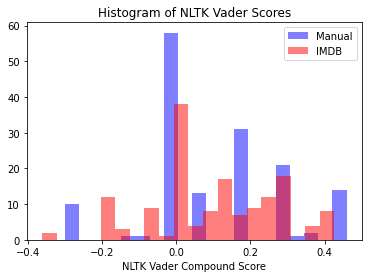

In [4069]:
plt.hist(full['Genre_NLTK'], bins = 20, color = 'blue', alpha = .5, label = 'Manual')
plt.hist(full['Genres_NLTK'], bins = 20, color = 'red', alpha = .5, label = 'IMDB')

plt.legend()
plt.xlabel('NLTK Vader Compound Score')
plt.title('Histogram of NLTK Vader Scores')
plt.show()

- The IMDB Genre column gives data that is more spaced out than my manual data column, with much lower peaks

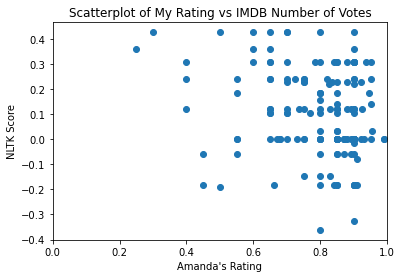

In [4070]:
plt.scatter(full['Rating'], full['Genres_NLTK'])
plt.xlim(0,1)
plt.xlabel('Amanda\'s Rating')
plt.ylabel('NLTK Score')
plt.title('Scatterplot of My Rating vs IMDB Number of Votes')
plt.show()

### Data: IMDB 4 Features + NLTK Score on IMDB Genres Column


In [4071]:
X_5 = full.loc[:, ['startYear','runtimeMinutes','numVotes','averageRating','Genres_NLTK']]
y_5 = full.loc[:, 'Rating']

X_Train_5, X_Test_5, Y_Train_5, Y_Test_5 = train_test_split(X_5, y_5, test_size = .20, train_size = .80, random_state = 42)



#### 1) Decision Tree with IMDB Data

Default

In [4072]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_5, Y_Train_5)

Y_Test_Pred = dt_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.23652835364152014
Mean Squared Error: 0.017950627240143367


In [4073]:
make_GridSearchCV_DT(X_Train_5, Y_Train_5)

0.001421297836236146
{'criterion': 'mse', 'max_depth': 1, 'min_samples_leaf': 4, 'splitter': 'random'}


R2 Score: 0.15851854913957852
Mean Squared Error: 0.019784781695478967


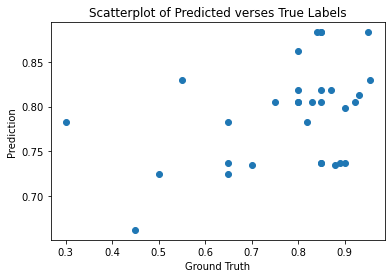

In [4152]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random', 
                                 max_depth = 5, min_samples_leaf = 4,
                                 random_state = 42)

dt_model.fit(X_Train_5, Y_Train_5)

Y_Test_Pred = dt_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

plt.scatter(Y_Test_5, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 2) Boosted Decision Tree

Default

In [4075]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_5, Y_Train_5)
Y_Test_Pred = boosted_dt_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.09784974262133317
Mean Squared Error: 0.021211217288873686


In [4076]:
make_GridSearchCV_Boosted_DT(X_Train_5, Y_Train_5)

-0.025216084488744083
{'learning_rate': 0.6, 'loss': 'linear', 'n_estimators': 10}


Best Params

R2 Score: 0.18329997245160612
Mean Squared Error: 0.0192021247042519


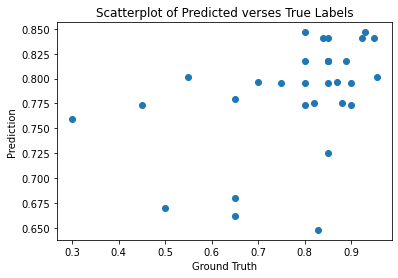

In [4077]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 10, learning_rate = 0.6, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_5, Y_Train_5)
Y_Test_Pred = boosted_dt_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

plt.scatter(Y_Test_5, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

Default

In [4078]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)

ann_model.fit(X_Train_5_sc, Y_Train_5)

Y_Test_Pred = ann_model.predict(X_Test_5_sc)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: -1.9089768009585546
Mean Squared Error: 0.06839541252552732


In [4079]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

make_GridSearchCV_ANN(X_Train_5_sc, Y_Train_5)

0.033799683975018445
{'activation': 'identity', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.01, 'solver': 'adam'}


Best Params

R2 Score: 0.2106986937522114
Mean Squared Error: 0.018557930207613305


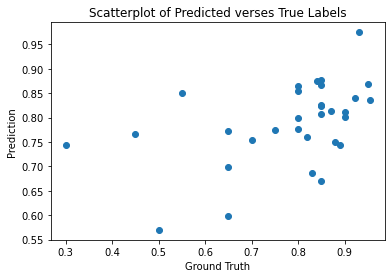

In [4080]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

ann_model =  MLPRegressor(activation = 'identity', solver = 'adam', random_state = 42,
                         hidden_layer_sizes = (20,), learning_rate_init = 0.01)

ann_model.fit(X_Train_5_sc, Y_Train_5)

Y_Test_Pred = ann_model.predict(X_Test_5_sc)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

plt.scatter(Y_Test_5, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 4) Random Forest

In [4081]:
rf_model = RandomForestRegressor(random_state = 42, criterion = 'mse', n_estimators = 100,
                                max_depth = None, min_samples_leaf = 1)
rf_model.fit(X_Train_5, Y_Train_5)
Y_Test_Pred = rf_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.3092048412386379
Mean Squared Error: 0.016241868906810043


In [4082]:
def make_GridSearchCV_RF(X_Train, Y_Train):

    #num_est = np.arange(10,100,step=5)
    num_est = [50, 100]
    criterions = ['mse']
    #max_depths = list(np.arange(1, 20, 2))
    max_depths = list(np.arange(3, 20, 2))
    #min_samples_leaf = list(np.arange(10, 20, 1))
    min_samples_leaf = list(np.arange(10, 20, 1))
    
    param_grid = {'n_estimators': num_est, 'criterion': criterions,
                 'max_depth': max_depths, 'min_samples_leaf': min_samples_leaf}

    classifier = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=param_grid, 
                       scoring = 'r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    


In [4083]:
make_GridSearchCV_RF(X_Train_5, Y_Train_5)

-0.04368064682593502
{'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 100}


R2 Score: 0.3092048412386379
Mean Squared Error: 0.016241868906810043


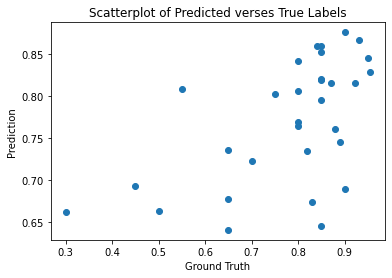

In [4159]:
rf_model = RandomForestRegressor(random_state = 42, criterion = 'mse', n_estimators = 100,
                                max_depth = None, min_samples_leaf = 1)

rf_model.fit(X_Train_5, Y_Train_5)
Y_Test_Pred = rf_model.predict(X_Test_5)

print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

plt.scatter(Y_Test_5, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### The most important columns

In [4085]:

# How many features do we need to get 95% of feature importance? 
def run_RFR(X_Data, Y_Data, n_est, min_samples, max_depth):
    
    rfr = RandomForestRegressor(n_estimators=n_est, min_samples_leaf=min_samples, max_depth = max_depth, criterion = 'mse',
                                random_state=42)
    
    importances = rfr.fit(X_Data, Y_Data).feature_importances_ 
    
    importances = pd.DataFrame(importances,columns=['Feature Importance'],index=X_Data.columns)
    importances.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    importances['Cum Sum'] = importances['Feature Importance'].cumsum()
    importances = importances[importances['Cum Sum']<=0.95]
    top_cols = importances.index.tolist()
    
    #return (importances, top_cols)
    return importances

In [4086]:
run_RFR(X_Train_5, Y_Train_5, 100, 12, 5)

,Feature Importance,Cum Sum
averageRating,0.333770,0.333770
runtimeMinutes,0.306389,0.640159
numVotes,0.167455,0.807614
Genres_NLTK,0.102698,0.910313


#### 5) KNN

In [4087]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_5_sc, Y_Train_5)
Y_Test_Pred = knn_model.predict(X_Test_5_sc)
            
print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.12634820838247762
Mean Squared Error: 0.020541165770609323


In [4088]:
def make_GridSearchCV_KNN(X_Train, Y_Train):
    
    ks = np.arange(1, 90, step = 2)
    ps = np.arange(1, 3, step = 1)

    weights = ['uniform', 'distance'] 
    param_grid = { 'n_neighbors': ks, 'weights': weights, 'p': ps}

    classifier = GridSearchCV(KNeighborsRegressor(),
                       param_grid=param_grid, 
                       scoring = 'r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    


In [4089]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

make_GridSearchCV_KNN(X_Train_5_sc, Y_Train_5)

0.04508328945638982
{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [4090]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

knn_model = KNeighborsRegressor(n_neighbors = 11, weights = 'distance', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_5_sc, Y_Train_5)
Y_Test_Pred = knn_model.predict(X_Test_5_sc)
            
print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.14296185448937204
Mean Squared Error: 0.0201505482934745


In [4091]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Test_5_sc = sc.transform(X_Test_5)

knn_model = KNeighborsRegressor(n_neighbors = 57, weights = 'distance', p = 1, algorithm = 'auto')
knn_model.fit(X_Train_5_sc, Y_Train_5)
Y_Test_Pred = knn_model.predict(X_Test_5_sc)
            
print("R2 Score:", r2_score(Y_Test_5, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_5, Y_Test_Pred))

R2 Score: 0.11916760427164896
Mean Squared Error: 0.02070999502362392


### Data: IMDB 4 Features + NLTK Average Score + 21 binary indicators

In [4092]:
#full.columns

In [4093]:
X_6 = full.loc[:, [
                    'startYear','numVotes','averageRating','Genres_NLTK',
                    #'startYear','numVotes','averageRating',
                   #'startYear','runtimeMinutes','numVotes','averageRating','Genres_NLTK',
                  'Mystery', 'Thriller', 'Sci-Fi', 'Romance',
           'Adventure', 'Musical', 'Comedy', 'Crime', 'Fantasy', 'Action',
           'Biography', 'Drama', 'Other']]

y_6 = full.loc[:, 'Rating']

#X_Train_6, X_Test_6, Y_Train_6, Y_Test_6 = train_test_split(X_6, y_6, test_size = .30, train_size = .70, random_state = 42)
X_Train_6, X_Test_6, Y_Train_6, Y_Test_6 = train_test_split(X_6, y_6, test_size = .20, train_size = .80, random_state = 42)
 

#### 1) Decision Tree

In [4094]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_6, Y_Train_6)

Y_Test_Pred = dt_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))



R2 Score: -0.8750595943673578
Mean Squared Error: 0.044086111111111104


In [4095]:
make_GridSearchCV_DT(X_Train_6, Y_Train_6)

-0.03842981692165839
{'criterion': 'mse', 'max_depth': 1, 'min_samples_leaf': 11, 'splitter': 'random'}


R2 Score: -0.061148185220891715
Mean Squared Error: 0.02494955197132616


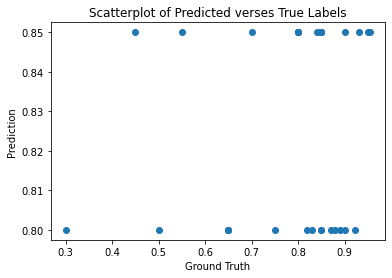

In [4096]:
dt_model = DecisionTreeRegressor(criterion = 'mae', splitter = 'random', 
                                 max_depth = 1, min_samples_leaf = 11,
                                 random_state = 42)

dt_model.fit(X_Train_6, Y_Train_6)

Y_Test_Pred = dt_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 2) Boosted DT

In [4097]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 50, learning_rate = 1.0, loss = 'linear', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_6, Y_Train_6)
Y_Test_Pred = boosted_dt_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

R2 Score: 0.05482186234300157
Mean Squared Error: 0.022222882153566235


In [4098]:
make_GridSearchCV_Boosted_DT(X_Train_6, Y_Train_6)

0.0020732799774590303
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 15}


R2 Score: 0.12687804072507003
Mean Squared Error: 0.020528708434535338


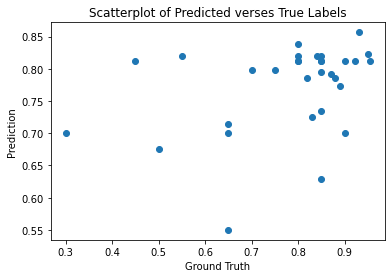

In [4099]:
boosted_dt_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), 
                                     n_estimators = 15, learning_rate = 0.5, loss = 'exponential', 
                                     random_state = 42)

boosted_dt_model.fit(X_Train_6, Y_Train_6)
Y_Test_Pred = boosted_dt_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 3) Artificial Neural Network

In [4100]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

ann_model =  MLPRegressor(activation = 'relu', solver = 'adam', random_state = 42)

ann_model.fit(X_Train_6_sc, Y_Train_6)

Y_Test_Pred = ann_model.predict(X_Test_6_sc)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

R2 Score: -0.5178975650843662
Mean Squared Error: 0.03568857273156295


In [4101]:
make_GridSearchCV_ANN(X_Train_6, Y_Train_6)

-0.08467934620724578
{'activation': 'logistic', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.05, 'solver': 'adam'}


R2 Score: 0.15294188484289684
Mean Squared Error: 0.019915899363712773


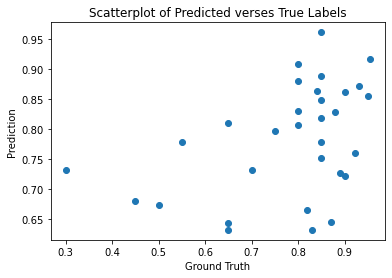

In [4102]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

ann_model =  MLPRegressor(activation = 'logistic', solver = 'adam', random_state = 42,
                         learning_rate_init = 0.05, hidden_layer_sizes = (20, ))

ann_model.fit(X_Train_6_sc, Y_Train_6)

Y_Test_Pred = ann_model.predict(X_Test_6_sc)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 4) Random Forest 

In [4103]:
rf_model = RandomForestRegressor(random_state = 42, criterion = 'mse', n_estimators = 100,
                                max_depth = None, min_samples_leaf = 1)
rf_model.fit(X_Train_6, Y_Train_6)
Y_Test_Pred = rf_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

R2 Score: 0.18293094432146617
Mean Squared Error: 0.019210801236559116


In [4104]:
make_GridSearchCV_RF(X_Train_6, Y_Train_6)

-0.04044821699440595
{'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 19, 'n_estimators': 100}


R2 Score: 0.0887382404083702
Mean Squared Error: 0.021425445519355796


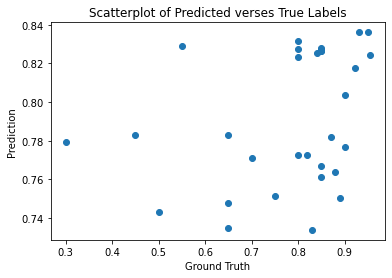

In [4105]:
rf_model = RandomForestRegressor(random_state = 42, criterion = 'mse', n_estimators = 100,
                                max_depth = 3, min_samples_leaf = 19)

rf_model.fit(X_Train_6, Y_Train_6)
Y_Test_Pred = rf_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

In [4106]:
run_RFR(X_Train_6, Y_Train_6, 50, 12, 5)

,Feature Importance,Cum Sum
averageRating,0.402693,0.402693
startYear,0.205741,0.608434
numVotes,0.164798,0.773232
Genres_NLTK,0.122007,0.895239


- 4 Features provide 95% of the feature importance. 
- We get 94% of the feature importance without using the Binary Columns

#### 5) XGBoost Tree

In [4107]:
data_dmatrix = xgboost.DMatrix(data=X_6,label=y_6)

xgb_model = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb_model.fit(X_Train_6, Y_Train_6)

Y_Test_Pred = xgb_model.predict(X_Test_6)

print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))


R2 Score: -0.930430401985151
Mean Squared Error: 0.04538798097395864


In [4108]:
def make_GridSearchCV_XGB(X_Train, Y_Train):
    
    learning_rates = np.arange(.1, 1, 0.1)
    max_depths = np.arange(3, 10, 2)
    num_estimators = np.arange(10, 100, 10)
    objectives = ['reg:squarederror', 'reg:logistic']
    
    param_grid = {'learning_rate': learning_rates, 'n_estimators': num_estimators,
                 'max_depth': max_depths, 'objective': objectives}

    classifier = GridSearchCV(xgboost.XGBRegressor(random_state=42),
                       param_grid=param_grid, 
                       scoring = 'r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [4109]:
#make_GridSearchCV_XGB(X_Train_6, Y_Train_6)

In [4110]:
data_dmatrix = xgboost.DMatrix(data=X_6,label=y_6)

xgb_model = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.4,
                max_depth = 3, alpha = 10, n_estimators = 10)

xgb_model.fit(X_Train_6, Y_Train_6)

Y_Test_Pred = xgb_model.predict(X_Test_6)


params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.4,
                'max_depth': 3, 'alpha': 10}

cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

#cv_results

R2 Score: -0.17917348252856824
Mean Squared Error: 0.027724544503114852


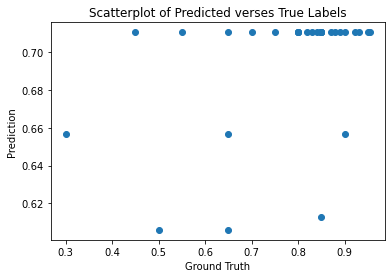

In [4111]:
print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 6) SVM 

In [4112]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

svm_model = SVR(C = 1.0, kernel = 'rbf', degree = 3)
svm_model.fit(X_Train_6_sc, Y_Train_6)
Y_Test_red = svm_model.predict(X_Test_6_sc)
            
print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

R2 Score: -0.17917348252856824
Mean Squared Error: 0.027724544503114852


In [4113]:
def make_GridSearchCV_SVM(X_Train, Y_Train):
    
    cs = [1,10]
    #cs = [1]
    kernels = ['linear','rbf', 'poly']
    degrees = [2, 3, 4]
    #degrees = [ 3]
    
    param_grid = {'C': cs, 'kernel': kernels, 'degree': degrees}

    classifier = GridSearchCV(SVR(),
                       param_grid=param_grid, 
                       scoring = 'r2',
                       cv=5)
    
    classifier =  classifier.fit(X_Train, Y_Train)
    print(classifier.best_score_)
    print(classifier.best_params_)
    

In [4114]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

make_GridSearchCV_SVM(X_Train_6_sc, Y_Train_6)

-0.15663986736420413
{'C': 1, 'degree': 2, 'kernel': 'linear'}


Best Params

R2 Score: 0.4922607999768216
Mean Squared Error: 0.011937885523708338


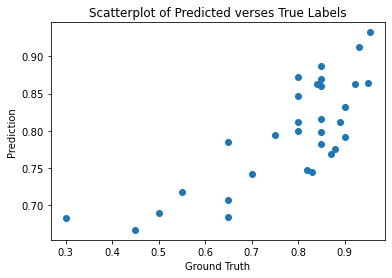

In [4115]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

svm_model = SVR(C = 1.0, kernel = 'linear', degree = 2)
svm_model.fit(X_Train_6_sc, Y_Train_6)
Y_Test_Pred = svm_model.predict(X_Test_6_sc)
            
print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 7) KNN 

Default

In [4116]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_6_sc, Y_Train_6)
Y_Test_Pred = knn_model.predict(X_Test_6_sc)
            
print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

R2 Score: 0.03010087091989111
Mean Squared Error: 0.02280411827956989


In [4117]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

make_GridSearchCV_KNN(X_Train_6_sc, Y_Train_6)

0.00043820559158294083
{'n_neighbors': 31, 'p': 2, 'weights': 'distance'}


R2 Score: 0.12808069532206268
Mean Squared Error: 0.02050043180570147


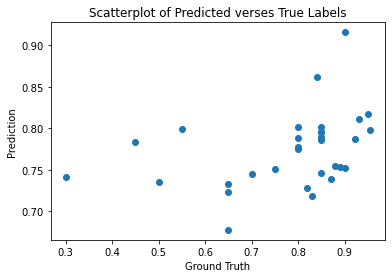

In [4118]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

knn_model = KNeighborsRegressor(n_neighbors = 31, weights = 'distance', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_6_sc, Y_Train_6)
Y_Test_Pred = knn_model.predict(X_Test_6_sc)
            
print("R2 Score:", r2_score(Y_Test_6, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_6, Y_Test_Pred))

plt.scatter(Y_Test_6, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

### Data: Remove the Release Year, not found to be useful

In [4119]:
X_7 = full.loc[:, ['startYear','numVotes','averageRating','Genres_NLTK']]
y_7 = full.loc[:, 'Rating']

X_Train_7, X_Test_7, Y_Train_7, Y_Test_7 = train_test_split(X_7, y_7, test_size = .20, train_size = .80, random_state = 42)
    

#### 1) Decision Tree

In [4120]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', 
                                 max_depth = None, min_samples_leaf = 1,
                                 random_state = 42)

dt_model.fit(X_Train_7, Y_Train_7)

Y_Test_Pred = dt_model.predict(X_Test_7)

print("R2 Score:", r2_score(Y_Test_7, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_7, Y_Test_Pred))



R2 Score: -0.3974958440689247
Mean Squared Error: 0.032857706093189956


In [4121]:
make_GridSearchCV_DT(X_Train_7, Y_Train_7)

0.011796456581754166
{'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 3, 'splitter': 'random'}


R2 Score: 0.08898376042886069
Mean Squared Error: 0.021419672890615964


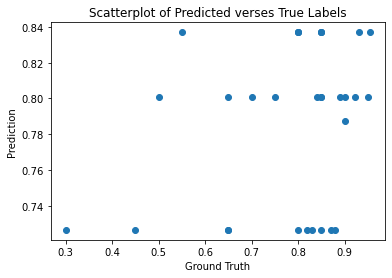

In [4122]:
dt_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random', 
                                 max_depth = 3, min_samples_leaf = 3,
                                 random_state = 42)

dt_model.fit(X_Train_7, Y_Train_7)

Y_Test_Pred = dt_model.predict(X_Test_7)

print("R2 Score:", r2_score(Y_Test_7, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_7, Y_Test_Pred))

plt.scatter(Y_Test_7, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

#### 7) KNN

In [4123]:
sc = StandardScaler()
X_Train_7_sc = sc.fit_transform(X_Train_7)
X_Test_7_sc = sc.transform(X_Test_7)

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_7_sc, Y_Train_7)
Y_Test_Pred = knn_model.predict(X_Test_7_sc)
            
print("R2 Score:", r2_score(Y_Test_7, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_7, Y_Test_Pred))

R2 Score: 0.048912215622071376
Mean Squared Error: 0.022361828853046602


In [4124]:
make_GridSearchCV_KNN(X_Train_7_sc, Y_Train_7)

0.02592402075304361
{'n_neighbors': 43, 'p': 1, 'weights': 'uniform'}


R2 Score: 0.0831196403761888
Mean Squared Error: 0.021557549174115218


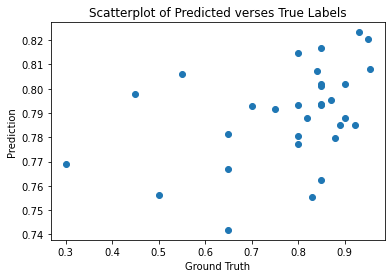

In [4125]:
sc = StandardScaler()
X_Train_7_sc = sc.fit_transform(X_Train_7)
X_Test_7_sc = sc.transform(X_Test_7)

knn_model = KNeighborsRegressor(n_neighbors = 43, weights = 'uniform', p = 1, algorithm = 'auto')
knn_model.fit(X_Train_7_sc, Y_Train_7)
Y_Test_Pred = knn_model.predict(X_Test_7_sc)
            
print("R2 Score:", r2_score(Y_Test_7, Y_Test_Pred))
print("Mean Squared Error:",mean_squared_error(Y_Test_7, Y_Test_Pred))

plt.scatter(Y_Test_7, Y_Test_Pred)
plt.title('Scatterplot of Predicted verses True Labels')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

### Final Step: Get Some Movie Recommendations 

Based on the model developed above, use the model to rank the IMDB Dataset and get some movie recommendations

In [4126]:
basics_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,6.0,154.0
1,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.0,39.0
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,607.0
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14.0


In [4127]:
basics_ratings.shape

(493215, 11)

#### Keep same pre-processing we used to build the model

In [4128]:
basics_ratings[['Genre_1','Genre_2','Genre_3']] = basics_ratings['genres'].str.split(',',expand=True)

# Replace Blanks with filling forward Genre 1 and Genre 2 
basics_ratings['Genre_2'] = basics_ratings['Genre_2'].fillna(basics_ratings['Genre_1'])
basics_ratings['Genre_3'] = basics_ratings['Genre_3'].fillna(basics_ratings['Genre_1'])

In [4129]:
# Apply this function to my Genre Columns
basics_ratings['Genre_1_NLTK'] = basics_ratings['Genre_1'].apply(get_vader_score)
basics_ratings['Genre_2_NLTK'] = basics_ratings['Genre_2'].apply(get_vader_score)
basics_ratings['Genre_3_NLTK'] = basics_ratings['Genre_3'].apply(get_vader_score)
basics_ratings['Genres_NLTK'] = (basics_ratings['Genre_1_NLTK'] + basics_ratings['Genre_2_NLTK'] + basics_ratings['Genre_3_NLTK'] ) / 3

In [4130]:

basics_ratings['Mystery'] = 0 
r = re.compile(r'.*(Mystery).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Mystery'] = 1
  
basics_ratings['Film-Noir'] = 0 
r = re.compile(r'.*(Film-Noir).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Film-Noir'] = 1
 
basics_ratings['Horror'] = 0 
r = re.compile(r'.*(Horror).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Horror'] = 1

basics_ratings['Thriller'] = 0 
r = re.compile(r'.*(Thriller).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Thriller'] = 1
 
basics_ratings['Animation'] = 0 
r = re.compile(r'.*(Animation).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Animation'] = 1

basics_ratings['Sci-Fi'] = 0 
r = re.compile(r'.*(Sci-Fi).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Sci-Fi'] = 1

basics_ratings['Sport'] = 0 
r = re.compile(r'.*(Sport).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Sport'] = 1

basics_ratings['Romance'] = 0 
r = re.compile(r'.*(Romance).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Romance'] = 1

basics_ratings['Documentary'] = 0 
r = re.compile(r'.*(Documentary).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Documentary'] = 1

basics_ratings['Adventure'] = 0 
r = re.compile(r'.*(Adventure).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Adventure'] = 1

# music and musical 
basics_ratings['Musical'] = 0 
r = re.compile(r'.*(Music).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Musical'] = 1

basics_ratings['Comedy'] = 0 
r = re.compile(r'.*(Comedy).*')
basics_ratings.loc[basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Comedy'] = 1

basics_ratings['Crime'] = 0 
r = re.compile(r'.*(Crime).*')
basics_ratings.loc[basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Crime'] = 1

basics_ratings['Fantasy'] = 0 
r = re.compile(r'.*(Fantasy).*')
basics_ratings.loc[basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Fantasy'] = 1

basics_ratings['Action'] = 0 
r = re.compile(r'.*(Action).*')
basics_ratings.loc[basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Action'] = 1

basics_ratings['History'] = 0 
r = re.compile(r'.*(History).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'History'] = 1

basics_ratings['Family'] = 0 
r = re.compile(r'.*(Family).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Family'] = 1

basics_ratings['Biography'] = 0 
r = re.compile(r'.*(Biography).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Biography'] = 1

basics_ratings['Drama'] = 0 
r = re.compile(r'.*(Drama).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'Drama'] = 1

basics_ratings['War'] = 0 
r = re.compile(r'.*(War).*')
basics_ratings.loc[ basics_ratings.genres.apply(lambda x: bool(r.match(x))), 'War'] = 1

basics_ratings['Other'] = 0
basics_ratings.loc[ (basics_ratings['Mystery'] == 0) & (basics_ratings['Film-Noir'] == 0) & \
                   (basics_ratings['Horror'] == 0) & (basics_ratings['Documentary'] == 0) & (basics_ratings['War'] == 0) & \
          (basics_ratings['Thriller'] == 0) & (basics_ratings['Animation'] == 0) & (basics_ratings['Sci-Fi'] == 0) & \
         (basics_ratings['Sport'] == 0) & \
        (basics_ratings['Romance'] == 0) &  \
         (basics_ratings['Adventure'] == 0) & (basics_ratings['Musical'] == 0 ) & (basics_ratings['Comedy'] == 0) & \
         (basics_ratings['Crime'] == 0) & (basics_ratings['Fantasy'] == 0) & (basics_ratings['Action'] == 0) & \
         (basics_ratings['History'] == 0) & (basics_ratings['Family'] == 0) & (basics_ratings['Biography'] == 0) & \
         (basics_ratings['Drama'] == 0) , 'Other'] = 1



In [4131]:
basics_ratings.iloc[:,-21:].sum()

Mystery         12559
Film-Noir         784
Horror          23087
Thriller        27458
Animation        6165
Sci-Fi           7908
Sport            5307
Romance         39139
Documentary     95902
Adventure       21811
Musical         18411
Comedy          86483
Crime           29025
Fantasy         10533
Action          39925
History         11128
Family          14033
Biography       12679
Drama          179085
War              7817
Other           77287
dtype: int64

In [4132]:
basics_ratings.loc[(basics_ratings['Horror'] == 1) |(basics_ratings['War'] == 1) | (basics_ratings['Documentary'] == 1) |
         (basics_ratings['Animation'] == 1) | (basics_ratings['Film-Noir'] == 1) | (basics_ratings['Sport'] == 1) |
         (basics_ratings['History'] == 1) & (basics_ratings['Family'] == 1) , "Other"] = 1

basics_ratings = basics_ratings.drop(columns = ['Horror','Documentary','War', 'Animation', 'Film-Noir', 'Sport', 'History', 'Family'])



#### Break it down

In [4133]:
basics_ratings = basics_ratings.dropna()
basics_ratings = basics_ratings[basics_ratings['runtimeMinutes'] != "\\N"]

X_Valid_6 = basics_ratings.loc[:, [
       # 'startYear', 'runtimeMinutes', 'numVotes', 'averageRating', 'Genres_NLTK',
       'startYear', 'numVotes', 'averageRating', 'Genres_NLTK',
        #'startYear', 'numVotes', 'averageRating',
        'Mystery', 'Thriller', 'Sci-Fi', 'Romance', 'Adventure',
       'Musical', 'Comedy', 'Biography', 'Drama',
       'Other', 'Crime', 'Fantasy', 'Action']]

X_Valid_5 = basics_ratings.loc[:, ['startYear','runtimeMinutes','numVotes','averageRating','Genres_NLTK']]


#### 6 vars

In [4134]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Valid_6_sc = sc.transform(X_Valid_6)

knn_model = KNeighborsRegressor(n_neighbors = 13, weights = 'distance', p = 2, algorithm = 'auto')
knn_model.fit(X_Train_6_sc, Y_Train_6)

Y_Valid_Pred = knn_model.predict(X_Valid_6_sc)

In [4135]:
sc = StandardScaler()
X_Train_6_sc = sc.fit_transform(X_Train_6)
X_Test_6_sc = sc.transform(X_Test_6)

svm_model = SVR(C = 1.0, kernel = 'linear', degree = 2)
svm_model.fit(X_Train_6_sc, Y_Train_6)

Y_Valid_Pred = svm_model.predict(X_Valid_6_sc)
 

#### This one is best, using just 5 variables

In [4136]:
sc = StandardScaler()
X_Train_5_sc = sc.fit_transform(X_Train_5)
X_Valid_5_sc = sc.transform(X_Valid_5)

#knn_model = KNeighborsRegressor(n_neighbors = 29, weights = 'distance', p = 1, algorithm = 'auto')
#knn_model = KNeighborsRegressor(n_neighbors = 29, weights = 'distance', p = 1, algorithm = 'auto')
knn_model = KNeighborsRegressor(n_neighbors = 59, weights = 'distance', p = 2, algorithm = 'auto')

knn_model.fit(X_Train_5_sc, Y_Train_5)

# New Validation Set
Y_Valid_Pred = knn_model.predict(X_Valid_5_sc)

In [4137]:
basics_ratings['pred_rating'] = Y_Valid_Pred

#### The Highest Rated Movies, according to my model

In [4138]:
basics_ratings.sort_values(by = 'pred_rating', ascending = False).head(15)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3,Genre_1_NLTK,Genre_2_NLTK,Genre_3_NLTK,Genres_NLTK,Mystery,Thriller,Sci-Fi,Romance,Adventure,Musical,Comedy,Crime,Fantasy,Action,Biography,Drama,Other,pred_rating
420341,tt5437928,movie,Colette,Colette,0,2018,\N,111,"Biography,Drama,History",6.7,19129.0,Biography,Drama,History,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0.9900
404113,tt4669788,movie,On the Basis of Sex,On the Basis of Sex,0,2018,\N,120,"Biography,Drama",7.1,26268.0,Biography,Drama,Biography,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0.9900
475895,tt8637428,movie,The Farewell,The Farewell,0,2019,\N,100,"Comedy,Drama",7.6,48734.0,Comedy,Drama,Comedy,0.3612,0.0000,0.3612,0.240800,0,0,0,0,0,0,1,0,0,0,0,1,0,0.9500
420833,tt5462602,movie,The Big Sick,The Big Sick,0,2017,\N,120,"Comedy,Drama,Romance",7.5,119925.0,Comedy,Drama,Romance,0.3612,0.0000,0.5574,0.306200,0,0,0,1,0,0,1,0,0,0,0,1,0,0.9500
38505,tt0053125,movie,North by Northwest,North by Northwest,0,1959,\N,136,"Adventure,Mystery,Thriller",8.3,296705.0,Adventure,Mystery,Thriller,0.3182,0.0000,0.1027,0.140300,1,1,0,0,1,0,0,0,0,0,0,0,0,0.9500
76838,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1789260.0,Drama,Romance,Drama,0.0000,0.5574,0.0000,0.185800,0,0,0,1,0,0,0,0,0,0,0,1,0,0.9450
34155,tt0047673,movie,White Christmas,White Christmas,0,1954,\N,120,"Comedy,Musical,Romance",7.6,32649.0,Comedy,Musical,Romance,0.3612,0.0000,0.5574,0.306200,0,0,0,1,0,1,1,0,0,0,0,0,0,0.9375
63603,tt0088763,movie,Back to the Future,Back to the Future,0,1985,\N,116,"Adventure,Comedy,Sci-Fi",8.5,1047525.0,Adventure,Comedy,Sci-Fi,0.3182,0.3612,0.0000,0.226467,0,0,1,0,1,0,1,0,0,0,0,0,0,0.9200
439408,tt6394270,movie,Bombshell,Bombshell,0,2019,\N,109,"Biography,Drama",6.8,83492.0,Biography,Drama,Biography,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0.9200
409142,tt4916630,movie,Just Mercy,Just Mercy,0,2019,\N,137,"Biography,Crime,Drama",7.6,44138.0,Biography,Crime,Drama,0.0000,-0.5423,0.0000,-0.180767,0,0,0,0,0,0,0,1,0,0,1,1,0,0.9100


### Top 100 Movies that I should see, based on my algorithm

In [4139]:
watched_list = full['Name'].unique()
to_watch = basics_ratings[~basics_ratings['primaryTitle'].isin(watched_list)]
to_watch.sort_values(by = 'pred_rating', ascending = False).head(100)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Genre_1,Genre_2,Genre_3,Genre_1_NLTK,Genre_2_NLTK,Genre_3_NLTK,Genres_NLTK,Mystery,Thriller,Sci-Fi,Romance,Adventure,Musical,Comedy,Crime,Fantasy,Action,Biography,Drama,Other,pred_rating
485980,tt9328132,movie,Chivas la película,Chivas la película,0,2018,\N,111,"Documentary,Sport",6.7,75.0,Documentary,Sport,Documentary,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0.854322
446116,tt6704776,movie,The Photographer of Mauthausen,El fotógrafo de Mauthausen,0,2018,\N,110,"Biography,Drama,History",6.7,7924.0,Biography,Drama,History,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0.848320
250583,tt11273332,movie,Almost a Comedy,Ban Ge Xi Ju,0,2019,\N,111,Drama,6.7,392.0,Drama,Drama,Drama,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0.847255
475994,tt8648744,movie,Ovunque proteggimi,Ovunque proteggimi,0,2018,\N,110,Drama,6.7,87.0,Drama,Drama,Drama,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0.841177
447324,tt6781296,movie,Straight Into a Storm,Straight into a Storm,0,2018,\N,110,"Biography,Documentary,Music",6.7,18.0,Biography,Documentary,Music,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,1,0.841114
459365,tt7520286,movie,Bisbee '17,Bisbee '17,0,2018,\N,112,"Documentary,Western",6.7,549.0,Documentary,Western,Documentary,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0.839970
435940,tt6206880,movie,Praça Paris,Praça Paris,0,2017,\N,110,Drama,6.7,229.0,Drama,Drama,Drama,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0.838205
432436,tt6036204,movie,Star Sand,Star Sand,0,2017,\N,110,Drama,6.7,6.0,Drama,Drama,Drama,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0.838052
483726,tt9133958,movie,On the Inside of a Military Dictatorship,On the Inside of a Military Dictatorship,0,2019,\N,110,Documentary,6.7,47.0,Documentary,Documentary,Documentary,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0.837435
247103,tt11066130,movie,Upstarts,Upstarts,0,2019,\N,112,Drama,6.7,656.0,Drama,Drama,Drama,0.0000,0.0000,0.0000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0.836108


Try this blog post: https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/